In [94]:
from sqlalchemy import create_engine, text
import pandas as pd
import numpy as np

db_conn = {
     "user": "root",
     "password": "Dhyoon96!",
     "host": "127.0.0.1",
     "database": "side_proj_FCO"
 }

db_engine = "mysql+pymysql://%s:%s@%s/%s" % (
    db_conn["user"],
    db_conn["password"],
    db_conn["host"],
    db_conn["database"]
)

engine = create_engine(db_engine, echo=True)

In [95]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('font', family = 'Malgun Gothic') # 한글 설정 (맑은 고딕)
mpl.rc('axes', unicode_minus = False) # 음수 부호 깨지는거 설정

import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [96]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [97]:
df_query = 'SELECT * FROM match_user'
df1 = pd.read_sql(df_query, con = engine);

2024-12-29 16:23:50,166 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-12-29 16:23:50,167 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-29 16:23:50,169 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-12-29 16:23:50,170 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-29 16:23:50,171 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-12-29 16:23:50,172 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-29 16:23:50,174 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-29 16:23:50,175 INFO sqlalchemy.engine.Engine [generated in 0.00075s] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT * FROM match_user'}
2024-12-29 16:23:50,178 INFO sqlalchemy.engine.Engine SELECT * FROM match_user
2024-12-29 16:23:50,179 INFO sqlalchemy.engine.Engine [raw sql] {}


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          141 non-null    object 
 1   user_ouid                         141 non-null    object 
 2   user_nickname                     141 non-null    object 
 3   match_result                      141 non-null    object 
 4   match_endtype                     141 non-null    int64  
 5   match_possession                  141 non-null    int64  
 6   match_avg_rating                  141 non-null    float64
 7   match_total_dribble               141 non-null    int64  
 8   match_total_pass_try              141 non-null    int64  
 9   match_total_pass_suc              141 non-null    int64  
 10  match_total_shoot                 141 non-null    int64  
 11  match_total_shoot_eff             141 non-null    int64  
 12  match_to

In [99]:
df1.describe()

match_endtype  match_possession  match_avg_rating  match_total_dribble  \
count     141.000000        141.000000        141.000000           141.000000   
mean        0.255319         50.595745          4.208983            65.198582   
std         0.578227          5.682025          0.439116            20.632229   
min         0.000000         34.000000          3.344440             3.000000   
25%         0.000000         47.000000          3.905560            56.000000   
50%         0.000000         50.000000          4.200000            68.000000   
75%         0.000000         53.000000          4.433330            77.000000   
max         2.000000         75.000000          5.855560           122.000000   

       match_total_pass_try  match_total_pass_suc  match_total_shoot  \
count            141.000000            141.000000         141.000000   
mean              92.241135             80.468085           7.865248   
std               28.257464             26.238617           4.076448   
min                2.000000              1.000000           0.000000   
25%               81.000000             66.000000           5.000000   
50%               97.000000             83.000000           8.000000   
75%              109.000000             96.000000          10.000000   
max              148.000000            143.000000          20.000000   

       match_total_shoot_eff  match_total_goal  attack_position_ratings  ...  \
count             141.000000        141.000000               141.000000  ...   
mean                5.680851          2.375887                 6.942340  ...   
std                 3.178767          1.705198                 0.823178  ...   
min                 0.000000          0.000000                 3.700000  ...   
25%                 3.000000          1.000000                 6.480000  ...   
50%                 6.000000          2.000000                 6.920000  ...   
75%                 8.000000          3.000000                 7.430000  ...   
max                17.000000          9.000000                 9.120000  ...   

       match_total_pass_short_try  match_total_pass_short_suc  \
count                  141.000000                  141.000000   
mean                    61.290780                   57.468085   
std                     25.828152                   24.786965   
min                      1.000000                    1.000000   
25%                     44.000000                   41.000000   
50%                     64.000000                   60.000000   
75%                     79.000000                   74.000000   
max                    121.000000                  115.000000   

       match_total_pass_long_try  match_total_pass_long_suc  \
count                 141.000000                 141.000000   
mean                    5.184397                   2.411348   
std                     3.332958                   1.971478   
min                     0.000000                   0.000000   
25%                     3.000000                   1.000000   
50%                     5.000000                   2.000000   
75%                     7.000000                   4.000000   
max                    15.000000                  10.000000   

       match_total_pass_through_try  match_total_pass_through_suc  \
count                    141.000000                    141.000000   
mean                      22.510638                     18.730496   
std                       13.089591                     10.881754   
min                        0.000000                      0.000000   
25%                       14.000000                     11.000000   
50%                       21.000000                     18.000000   
75%                       28.000000                     24.000000   
max                       71.000000                     58.000000   

       match_total_shoot_outpenalty_try  match_total_shoot_outpenalty_suc  \
count                        141.000000               

In [100]:
df1['match_result'].value_counts()

match_result
승    66
패    59
무    16
Name: count, dtype: int64

In [101]:
df1['match_endtype'].value_counts() # 0 : 정상 종료, 1 : 몰수승, 2 : 몰수패

match_endtype
0    115
1     16
2     10
Name: count, dtype: int64

---

# 변수간 상관관계 및 VIF 확인

### 변수간 상관관계 분석 

In [102]:
df1_temp = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 'match_result', 'match_endtype'])

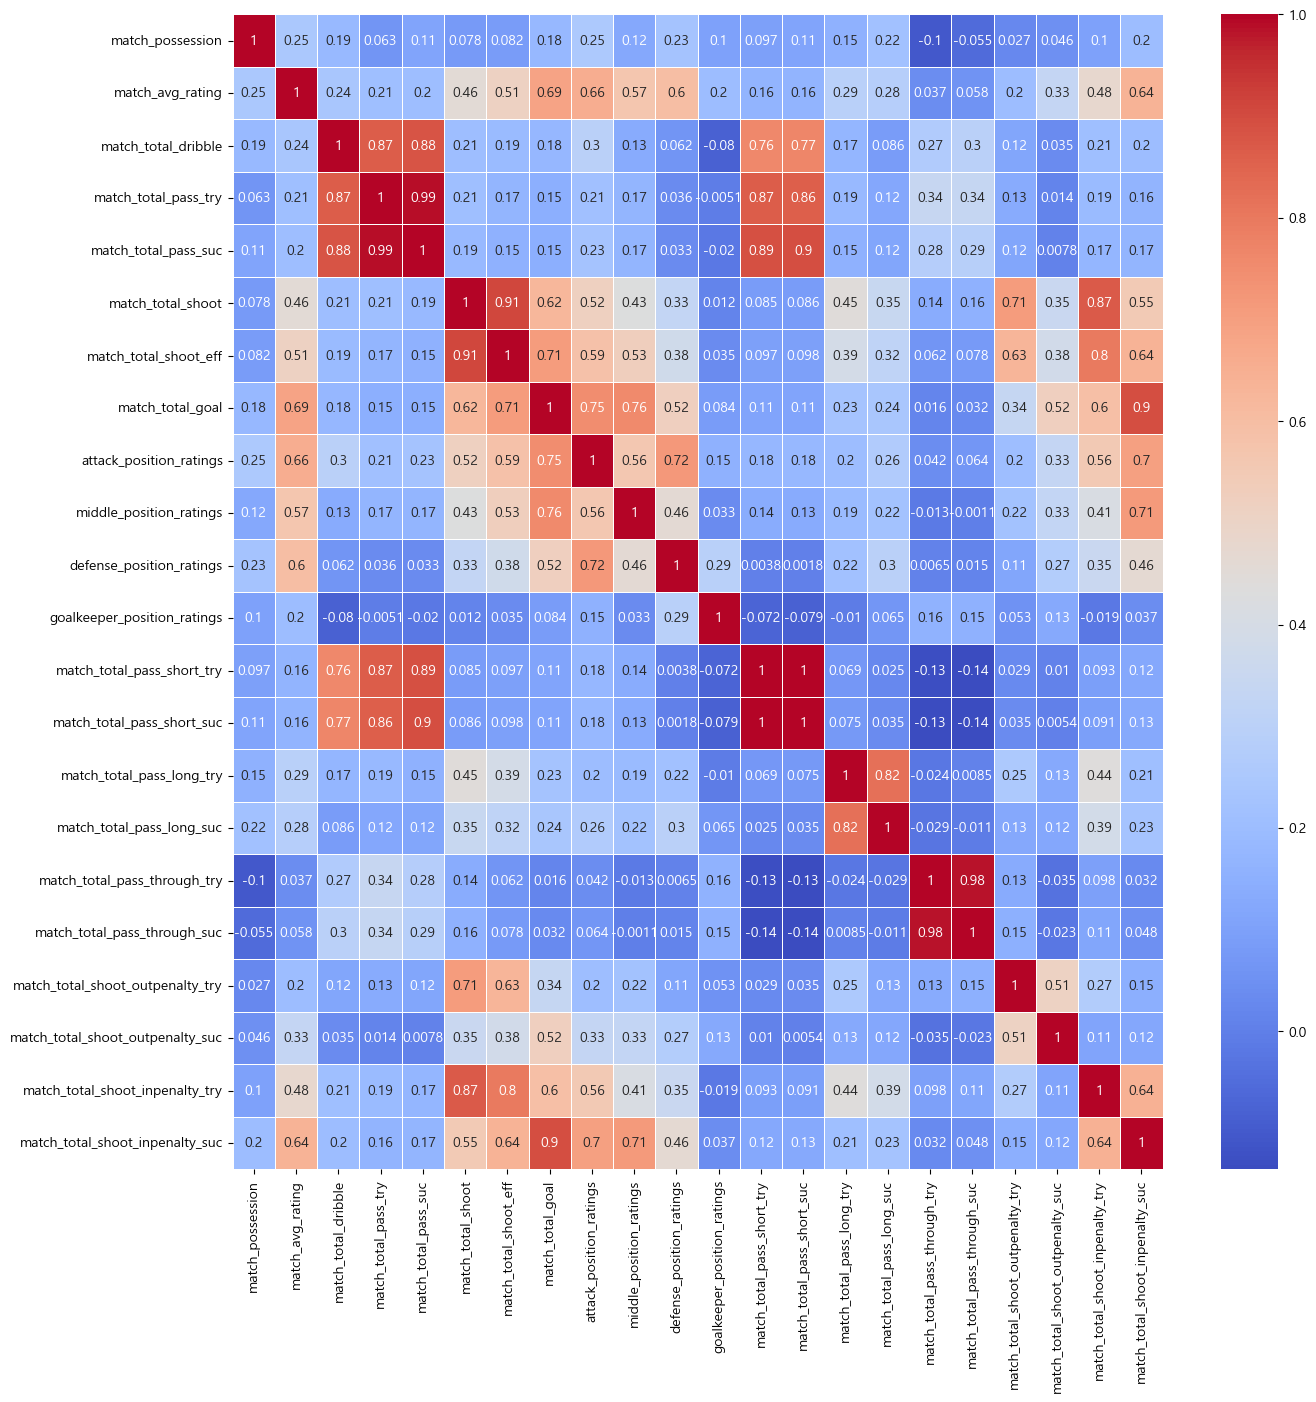

In [103]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df1_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [106]:
threshold = 0.8
corr_matrix = df1_temp.corr()

strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))    
    .stack()    
    .reset_index()  
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

                       Variable 1                       Variable 2  \
41            match_total_dribble             match_total_pass_try   
42            match_total_dribble             match_total_pass_suc   
60           match_total_pass_try             match_total_pass_suc   
68           match_total_pass_try       match_total_pass_short_try   
69           match_total_pass_try       match_total_pass_short_suc   
85           match_total_pass_suc       match_total_pass_short_try   
86           match_total_pass_suc       match_total_pass_short_suc   
95              match_total_shoot            match_total_shoot_eff   
109             match_total_shoot  match_total_shoot_inpenalty_try   
139              match_total_goal  match_total_shoot_inpenalty_suc   
186    match_total_pass_short_try       match_total_pass_short_suc   
203     match_total_pass_long_try        match_total_pass_long_suc   
216  match_total_pass_through_try     match_total_pass_through_suc   

     Correlation  


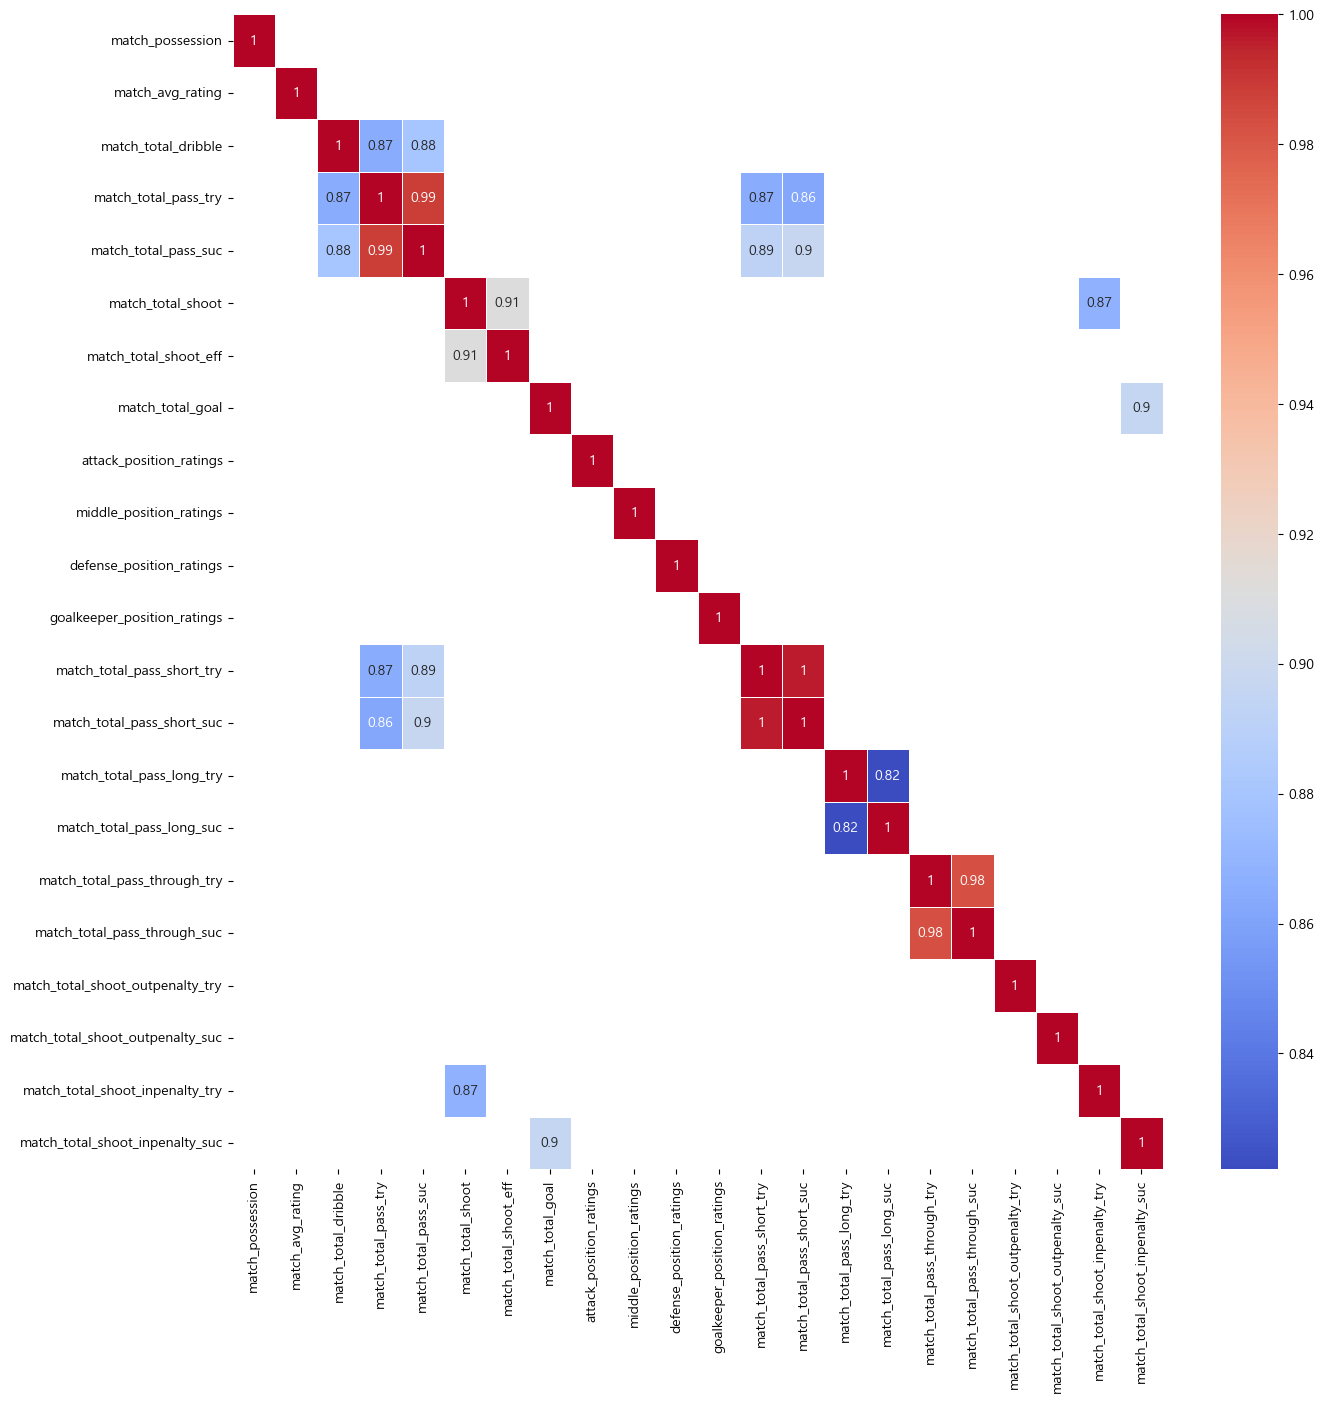

In [107]:
mask = np.abs(corr_matrix) <= threshold  

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidths = 0.5, cmap = 'coolwarm', ax = ax)
plt.show()

### 변수 제거 후 상관계수 및 VIF 확인

In [108]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Removal Based on VIF Threshold
def calculate_vif_(X, thresh = 10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped = True
    
    while dropped:
        dropped = False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"Dropping '{X[cols[variables]].columns[maxloc]}' at index {maxloc}")
            variables = np.delete(variables, maxloc)
            dropped = True

    if len(variables) == 0:
        print("All variables were removed. No remaining variables.")
        return pd.DataFrame() 

    print("Remaining variables:")
    print(X.columns[variables])
    return X[cols[variables]]

df2_temp = calculate_vif_(df1_temp)

# df2_temp = df1_temp.drop(columns = ['match_avg_rating', 
#                           'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
#                           'match_total_shoot', 'match_total_shoot_eff', 
#                           'match_total_pass_short_suc', 'match_total_pass_through_suc', 'match_total_pass_long_suc', 
#                           'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_suc']
#                            + position_ratings_col)

Dropping 'match_total_pass_suc' at index 4
Dropping 'match_total_shoot' at index 4
Dropping 'match_total_pass_short_try' at index 10
Dropping 'match_total_pass_try' at index 3
Dropping 'defense_position_ratings' at index 7
Dropping 'match_avg_rating' at index 1
Dropping 'match_total_goal' at index 3
Dropping 'attack_position_ratings' at index 3
Dropping 'match_total_pass_through_suc' at index 9
Dropping 'middle_position_ratings' at index 3
Dropping 'match_total_dribble' at index 1
Dropping 'match_possession' at index 0
Dropping 'match_total_shoot_eff' at index 0
Dropping 'match_total_pass_long_try' at index 2
Dropping 'goalkeeper_position_ratings' at index 0
Remaining variables:
Index(['match_total_pass_short_suc', 'match_total_pass_long_suc',
       'match_total_pass_through_try', 'match_total_shoot_outpenalty_try',
       'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_try',
       'match_total_shoot_inpenalty_suc'],
      dtype='object')


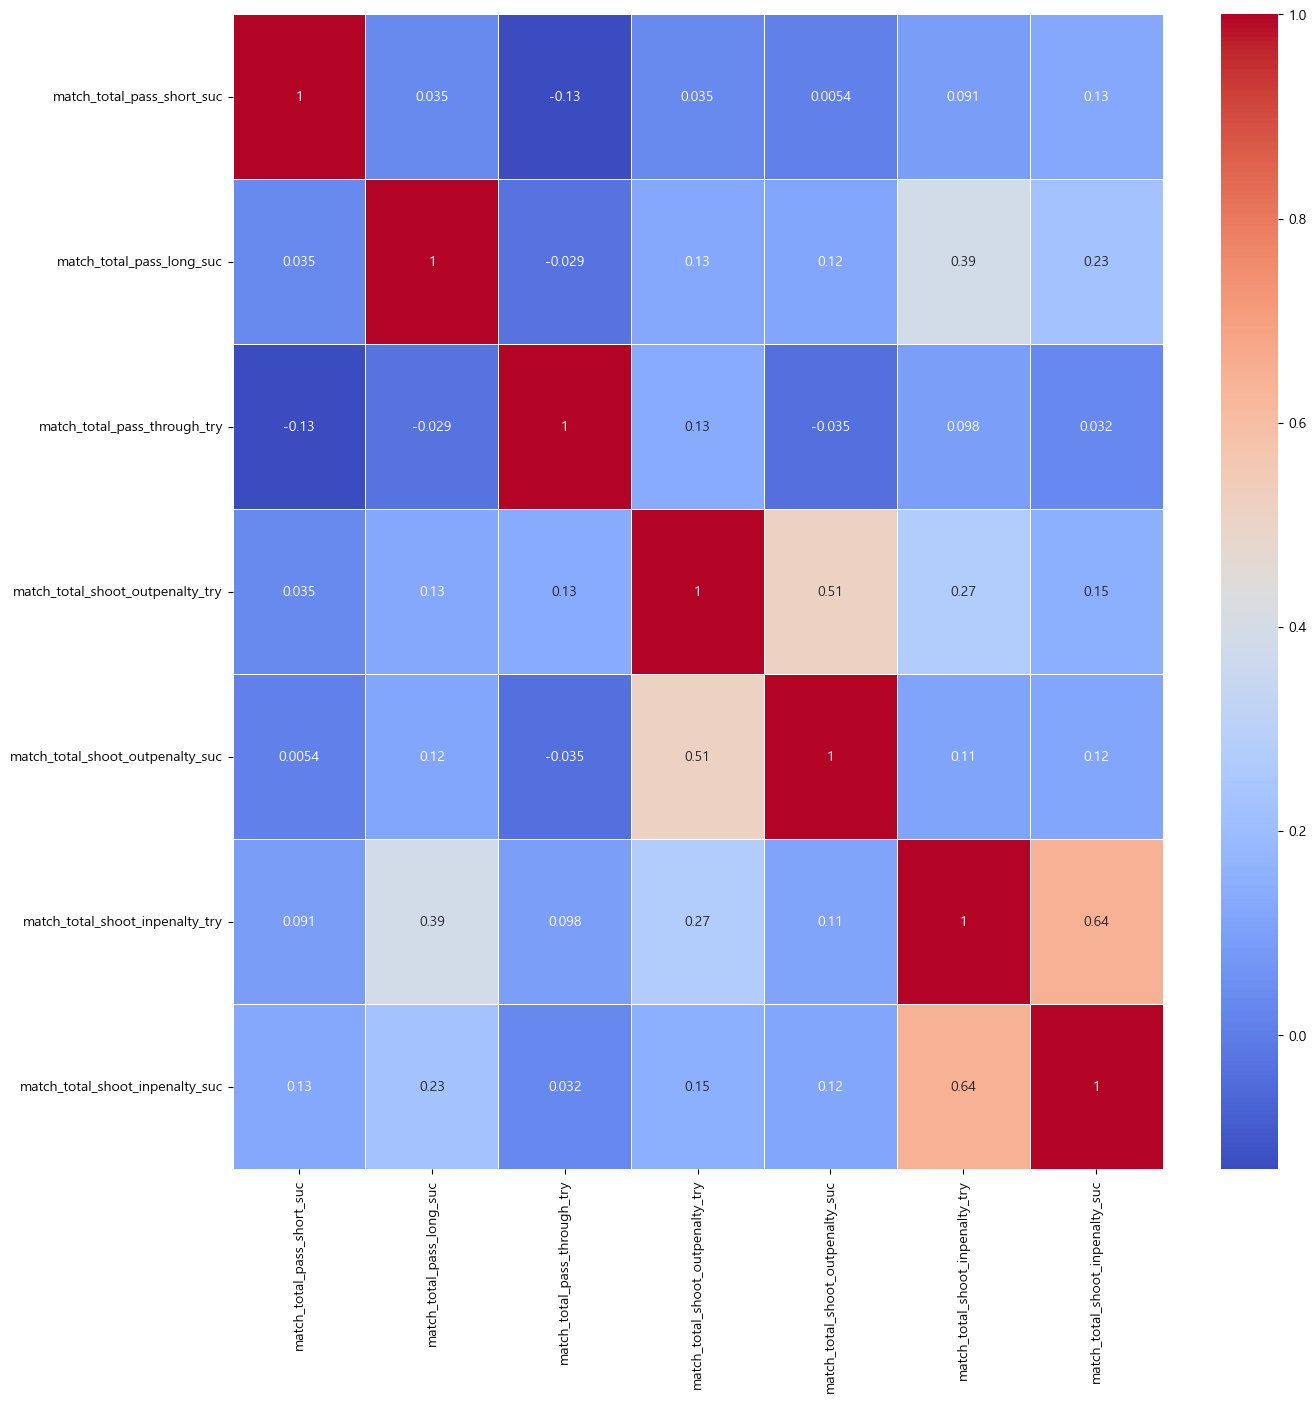

In [109]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df2_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [110]:
threshold = 0.7
corr_matrix = df2_temp.corr()
strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))  
    .stack()   
    .reset_index()    
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

vif_data = calculate_vif(df2_temp)
vif_data

Variable       VIF
0        match_total_pass_short_suc  3.786344
1         match_total_pass_long_suc  2.884599
2      match_total_pass_through_try  3.116137
3  match_total_shoot_outpenalty_try  3.696073
4  match_total_shoot_outpenalty_suc  1.972015
5   match_total_shoot_inpenalty_try  8.347116
6   match_total_shoot_inpenalty_suc  4.713694

---

---

In [112]:
basic_col = ['match_possession', 
             'match_avg_rating', 
             'match_total_dribble', 
             'match_total_goal', 
             'match_total_shoot', 
             'match_total_pass_suc']

position_ratings_col = ['attack_position_ratings', 
                        'middle_position_ratings', 
                        'defense_position_ratings', 
                        'goalkeeper_position_ratings']

pass_col = ['match_total_pass_try', 
            'match_total_pass_suc',    
            'match_total_pass_short_try',
            'match_total_pass_short_suc', 
            'match_total_pass_long_try',
            'match_total_pass_long_suc', 
            'match_total_pass_through_try', 
            'match_total_pass_through_suc']

shoot_col = ['match_total_shoot', 
             'match_total_shoot_eff', 
             'match_total_shoot_outpenalty_try', 
             'match_total_shoot_outpenalty_suc', 
             'match_total_shoot_inpenalty_try', 
             'match_total_shoot_inpenalty_suc']

In [119]:
df3 = df1.copy()

df1_win_query = "SELECT * FROM match_user WHERE match_result = '승'"
df3_win = pd.read_sql(df1_win_query, con = engine)

df3_draw_query = "SELECT * FROM match_user WHERE match_result = '무'"
df3_draw = pd.read_sql(df3_draw_query, con = engine)

df3_lose_query = "SELECT * FROM match_user WHERE match_result = '패'"
df3_lose = pd.read_sql(df3_lose_query, con = engine)

2024-12-29 16:28:05,147 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-29 16:28:05,148 INFO sqlalchemy.engine.Engine [cached since 255s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '승'"}
2024-12-29 16:28:05,151 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '승'
2024-12-29 16:28:05,151 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-29 16:28:05,155 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-29 16:28:05,155 INFO sqlalchemy.engine.Engine [cached since 255s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '무'"}
2024-12-29 16:28:05,155 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '무'
2024-12-29 16:28:05,155 I

In [120]:
df3_win

match_id                         user_ouid user_nickname  \
0   6770ca467705eaf9e115599b  198f4cf7dec8af391eb48ed4a8a30533        근사한트롤3   
1   6770ca473bd889390bbf818e  697b36885d2d984e2e808de53401de8a          냥냥댕댕   
2   6770ca4754c99dc9780d870b  4bfdd3bc98695f1af5cc8c57cfde75dc          난히덩크   
3   6770ca477202c8b273d3d6d5  8639a23405e6a43fa189587721d793b1       HONGSIE   
4   6770ca47ccb3e5542215a430  55876433d0e7173b882e7e274b772196         노랑색훈이   
..                       ...                               ...           ...   
61  6770ca4fc53d84bf7c0ed4cd  122dac6f78d2ce74d7a69ee28882419f         오다기리쵸   
62  6770ca4fd5c5b52b3535a273  31ffb492ee810b55999f59afe9387f42         BRAED   
63  6770ca5038ae708e3c955bc9  19b8f7f14421556d0f41943645e71a7d          l큰별l   
64  6770ca503ff69e3ba0d11335  05aad860e1971db6380709069339f82c      스왈로우1977   
65  6770ca508aa613628eb6d498  2a8120df739df5c610cf68195a87078e        앞날창창도윤   

   match_result  match_endtype  match_possession  match_avg_rating  \
0             승              0                75           4.64444   
1             승              1                58           4.20000   
2             승              0                55           4.43333   
3             승              1                51           4.40000   
4             승              0                49           4.18333   
..          ...            ...               ...               ...   
61            승              0                44           4.22778   
62            승              0                44           4.34444   
63            승              0                54           4.93333   
64            승              0                52           4.21667   
65            승              1                52           4.42222   

    match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                    64                    91                    83  ...   
1                    35                    59                    55  ...   
2                    55                    75                    63  ...   
3                    28                    34                    27  ...   
4                    73                   105                    95  ...   
..                  ...                   ...                   ...  ...   
61                   71                    87                    71  ...   
62                   48                    85                    74  ...   
63                   64                    75                    64  ...   
64                   77                   104                    91  ...   
65                   72                    84                    71  ...   

    match_total_pass_short_try  match_total_pass_short_suc  \
0                           49                          47   
1                           44                          42   
2                           33                          29   
3                           20                          17   
4                           78                          74   
..                         ...                         ...   
61                          63                          60   
62                          44                          41   
63                          39                          36   
64                          58                          52   
65                          47                          42   

    match_total_pass_long_try  match_total_pass_long_suc  \
0                          14                         10   
1                           6                          5   
2                           5                          4   
3                           4                          2   
4                           3                          2   
..                        ...                        ...   
61                          6                          1   
62                          5                          3   
63                  

In [121]:
df3_draw

match_id                         user_ouid user_nickname  \
0   6770ca477d00879b1fc04dbd  75a1c9e9fad68338d41a505cdb403592           정용맘   
1   6770ca477d00879b1fc04dbd  7fb6fb2e3c049536c9d1357c80ceeca5           베르모   
2   6770ca48b43d17a6abe78471  bba4bb1fd18e328ba9fd0d2ba0fbe3e3           셭트업   
3   6770ca48b43d17a6abe78471  d5da9f6b550b4cd7ad78403e646571d0       FC노장의투혼   
4   6770ca4a6b8a0c835b4a8235  458e0c369b22c2fe58c3d76db8ce2bfd         슛돌이조던   
5   6770ca4a6b8a0c835b4a8235  f5a57640a2da2a3b58628153c5cf7588         창수네분식   
6   6770ca4c1e37421ab4aa9eb6  3992e3419b4c5b54fd1c653ab2d72b5a           미레미   
7   6770ca4c1e37421ab4aa9eb6  ca42bd29e5edd6880c6c0216586943c9       장현수봉사활동   
8   6770ca4e07081e1b27c675ff  037c25924c8b5ce5b8be0bba0d100ac4       손흥민5카가자   
9   6770ca4e07081e1b27c675ff  48fae123af4126edf2805389b78e68dc          따땃하제   
10  6770ca4f00caebe2fe2b2ae0  7fe2f8e00cfe8ec41bd1ed3987f3db6a      오겜개최자킹정무   
11  6770ca4f00caebe2fe2b2ae0  e528e2ddf6a748c26823c75775777c9b       티보요쿠르트아   
12  6770ca4f0f4d7344e5d0ebd8  9e8f7e5bca4d220f54b71c7d8e1fe3b5            백쿵   
13  6770ca4f0f4d7344e5d0ebd8  c2b72c63375f9cef4eb3ec8a42a26d42          구단주뎀   
14  6770ca50683708b6345fe92e  22c075c408f67e65439f9a725d57921e       1356rh4   
15  6770ca50683708b6345fe92e  e0ea5a000fac2c1d351ccebc588ed8b2         제갈량77   

   match_result  match_endtype  match_possession  match_avg_rating  \
0             무              0                53           4.11667   
1             무              0                47           5.21111   
2             무              0                52           4.08333   
3             무              0                48           4.21111   
4             무              0                49           4.21111   
5             무              0                51           4.27222   
6             무              0                52           4.23889   
7             무              0                48           4.11111   
8             무              0                51           4.38889   
9             무              0                49           4.21111   
10            무              0                54           4.16111   
11            무              0                46           4.20000   
12            무              0                50           4.71667   
13            무              0                50           4.16111   
14            무              0                45           4.30000   
15            무              0                55           5.71111   

    match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                    71                   109                    96  ...   
1                    62                    95                    86  ...   
2                    77                    97                    85  ...   
3                    50                    76                    67  ...   
4                    67                   106                    90  ...   
5                    73                    93                    77  ...   
6                    80                   122                   107  ...   
7                    45                    91                    77  ...   
8                    56                   104                    88  ...   
9                    59                    96                    83  ...   
10                   91                   121                   108  ...   
11                   50                    77                    65  ...   
12                   89                   120                   102  ...   
13                   70                   118                   105  ...   
14                   53                    84                    69  ...   
15                   75                   112                    96  ...   

    match_total_pass_short_try  match_total_pass_short_suc  \
0                           85                          80   
1                           67                     

In [122]:
df3_lose

match_id                         user_ouid  \
0   6770ca4754c99dc9780d870b  e46c0a63ae73d487734c8e3412dd260b   
1   6770ca477202c8b273d3d6d5  453f7fba272abb57cab08851980b1565   
2   6770ca47ccb3e5542215a430  41b0515ab81b0872960adc4cc6aa1c3b   
3   6770ca4850e96ba4e2b78d18  00e17418c19e6b5dc9741b961173590d   
4   6770ca4861fc0e4a3e915dda  4203f6ea50759e3ef15c482345a6b6d9   
5   6770ca48a79b8752b2ae0af4  5d1063250b400a068df810f7680a7f5b   
6   6770ca49065357e6c715283a  c3553eaeacbddd58c72dd167063821c1   
7   6770ca491ed8235c16c2118d  970cc57987a55144130dbd251155bc4c   
8   6770ca494449a34884f0d74b  58802d898f9fef983b49543137c201ef   
9   6770ca49947d3f38729ce5aa  6601665e92aecdfdf44ba944dd6bfd0e   
10  6770ca4a120d9b38e09b6ea6  9bb3b124a1422aaa8df13dbe02a51762   
11  6770ca4a96a120f4c5e72fa6  2527ec3af0f4d73fd87307f50b562972   
12  6770ca4aa4ff771aa71541d7  0e6d1a66c69cd248e298bdc910ce2087   
13  6770ca4aaeceee5e1fb3b2b0  0f08e9079dbc4e60b12d6c2a6745c942   
14  6770ca4ab41bd8099e2858bf  8d615f5da71a715bd4cf246a114c966e   
15  6770ca4ae8eb5c609a741c32  a984e83e3e081c98e52eafcc3db5632e   
16  6770ca4aeec9d0fd86c4da63  c2cb26c293160eab8bc73ed491b43738   
17  6770ca4afcf1b247f42c0cad  a79d415be21805591f8430df05c78d49   
18  6770ca4b10ff5c253cd3207a  18603ced12c439538f0cafddfba5285b   
19  6770ca4b176daa16dcfefa9d  1cbf263490b1fdfb37517e9ec76c5854   
20  6770ca4b19438c5c78694f20  28fa006ac106965d159c1c03fe5c826a   
21  6770ca4b28fd10277c1cdf5a  d785df4703607150d2f25c984aba8f57   
22  6770ca4b440f51319068e138  122ae84759fdd8cd26941fceb5d79c7f   
23  6770ca4b636355b9b3e72026  6b8e0bcf52aec6f91ab176e19d28edc6   
24  6770ca4b8540754a0feb7611  da48b078151baeee1f5214ec218cbbea   
25  6770ca4b870936be113ccfad  60e9d59a3ac2a60d3c39cb66c11a19aa   
26  6770ca4b90bfba0624aeb130  e1b5296df1068ad19814620cf409791e   
27  6770ca4c2a55c072b3850e25  409bbe833fe5d70d474c107fdbb18093   
28  6770ca4c2a8c2c269d5191fe  893698eac1cc82a698304e1ce02f2407   
29  6770ca4c878760472c790c88  178efefdfffb2c61480060b1dcb3bbb6   
30  6770ca4ca5944f2ceb740bf0  230c16a4de867ad387f3e9df3eb42288   
31  6770ca4cbf146ee6fbb7b333  6c747fa22af3c390beaa15e631b5785c   
32  6770ca4d050696435e8c3464  18d75676b1d2aa3342cc56be0d382142   
33  6770ca4d1bf99ef2d2ead087  98bd14122ef553eb3db7cb97f7ee87f1   
34  6770ca4d21838ecc668c9b86  540e271484f64421ca8f497bbd8f46ab   
35  6770ca4d4df9cdf965eea0bf  38dacb888dab82eb1c4c82d3d49cd183   
36  6770ca4da6bde52d93b57842  5e07bc50476989844f590740e4415502   
37  6770ca4ddb22006be4e5f046  bcb457e5b61c3d580576659112996b81   
38  6770ca4dfc7fb5392d9d9ee7  82a00d232eba1628a8e220efcd489257   
39  6770ca4e07f06ff6393b7d56  dd730c01c1fa05617f0500d1c3eea1c0   
40  6770ca4e7ec50ebfa5412f41  a524892ef288ab48efa1e6607e9c0721   
41  6770ca4e883229302afdef5a  cd94040cd96b08e275d2526a204c4855   
42  6770ca4e908fc7d02036fc70  d454d16ef36ebf21bd6adec560844143   
43  6770ca4eaeff94459ea843f7  9dd9ed400ae21ddebeda078548d47a9e   
44  6770ca4ebf5f6f1f04d571eb  d252a205e953b522dbe35d49e0ee7f7c   
45  6770ca4ee37c8ad8c5be4bf9  4029ac557c5f6af90fd1c8212a08cdbb   
46  6770ca4f18acdb0fa904625a  3ad2bf6a64af9362398ea2b0dbd42c58   
47  6770ca4f53541a2c8f161b34  e090aa681e51543b0d189029c9aadf6b   
48  6770ca4f632306d8addd9572  46e4f25b9dfc4f6659f1f72b7dc4956a   
49  6770ca4f7fd5237cdba07c54  8f02ba8a3f699ea64dcaac3c1181dd8b   
50  6770ca4f829b4579431fd467  1bf64dc9cf0c0cf5316235479d05552f   
51  6770ca4f887995f957e4fd15  ed08fca300ad8f683a64cc1778345e5b   
52  6770ca4fb459670075a3c644  0e2c9f500d28a0b5dae8e20973a80e2d   
53  6770ca4fbc7074b1cd0fb83b  161f5c3dccdca3bd391dd63e3cd827ef   
54  6770ca4fc53d84bf7c0ed4cd  cd40eccccbb06d2d658d58484dcacc34   
55  6770ca4fd5c5b52b3535a273  87f458b4b08687955a901c713b9519c5   
56  6770ca5038ae708e3c955bc9  ebe4ee4a1153623c3229e2f5b5e9cfa7   
57  6770ca503ff69e3ba0d11335  11c2cb5a9c78a47c7ba320564465b7b5   
58  6770ca508aa613628eb6d498  d2882cc0f59c46dbcea17ba080f48597   

       user_nickname match_result  match_endtype  match_pos

---

## Stat별 HIST

In [138]:
def col_hist_all(_df, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        bins = 15
        
        sns.histplot(_df[col].values, color = 'green', kde = True, ax = ax[idx], 
                     bins = bins, alpha = 0.6, stat = 'count')   
        
        ax[idx].set_title(_col_name[idx])
        ax[idx].set_xlim(0, max(7, max(_df[col])))

    plt.tight_layout()
    plt.show()

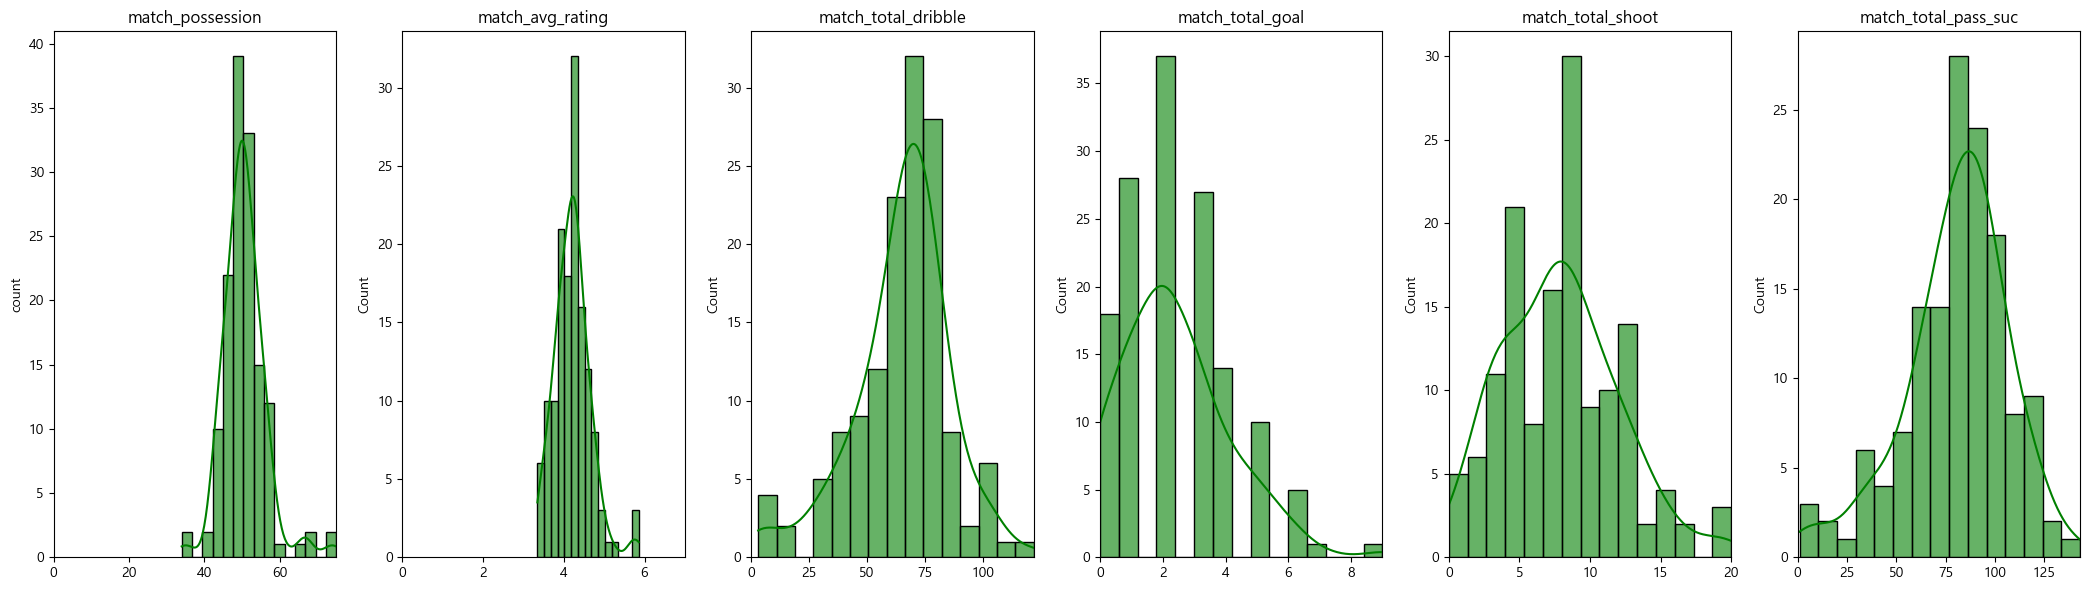

In [139]:
col_hist_all(df3, basic_col)

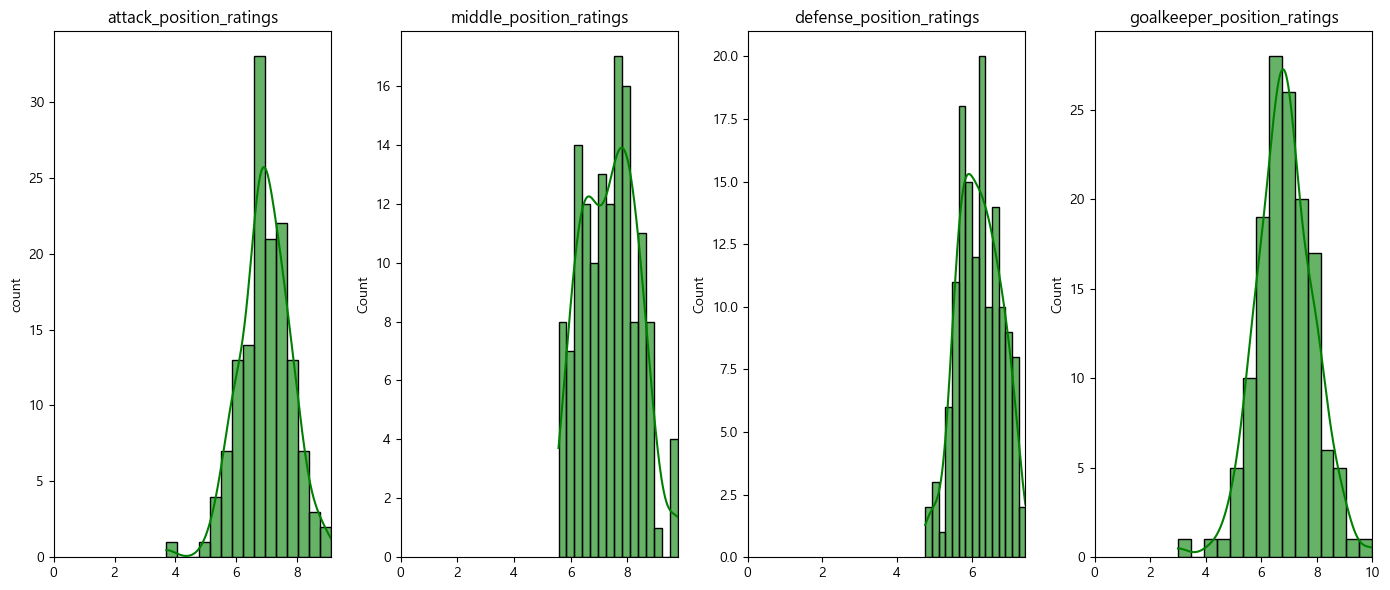

In [140]:
col_hist_all(df3, position_ratings_col)

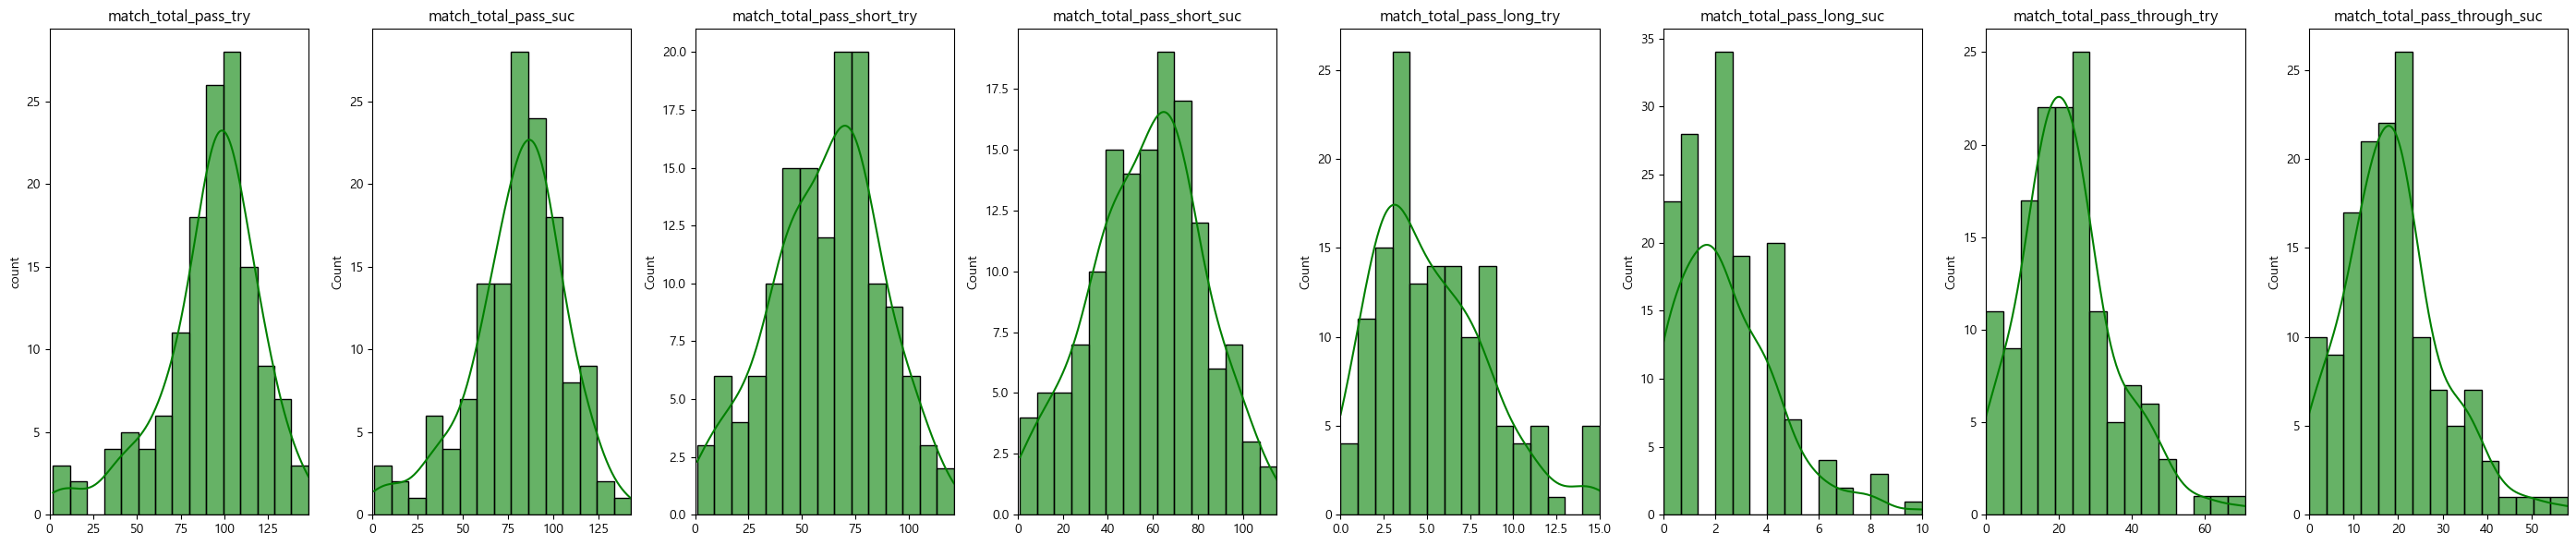

In [141]:
col_hist_all(df3, pass_col)

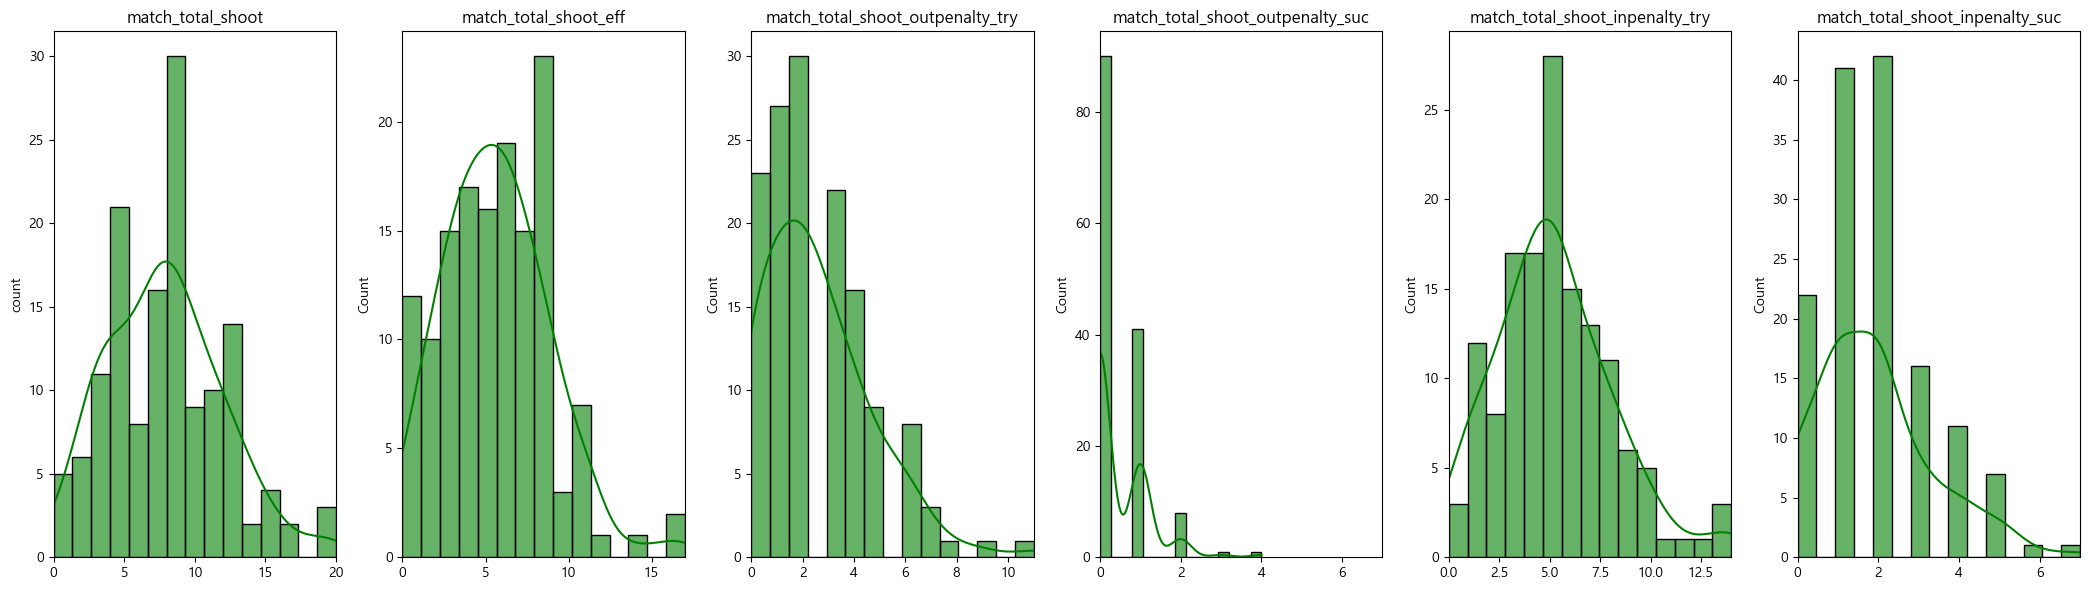

In [142]:
col_hist_all(df3, shoot_col)

---

## 승, 패에 따른 Stat별 HIST

In [158]:
def col_hist(_df_win, _df_lose, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]
        
    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        bins = 10 
        
        sns.histplot(_df_win[col].values, color = 'blue', kde = True, ax = ax[idx], label = '승', 
                     bins = bins, alpha = 0.6)
        sns.histplot(_df_lose[col].values, color = 'red', kde = True, ax = ax[idx], label = '패', 
                     bins = bins, alpha = 0.6)   
        
        ax[idx].set_title(_col_name[idx])
        ax[idx].legend()
    
    plt.tight_layout()
    plt.show()

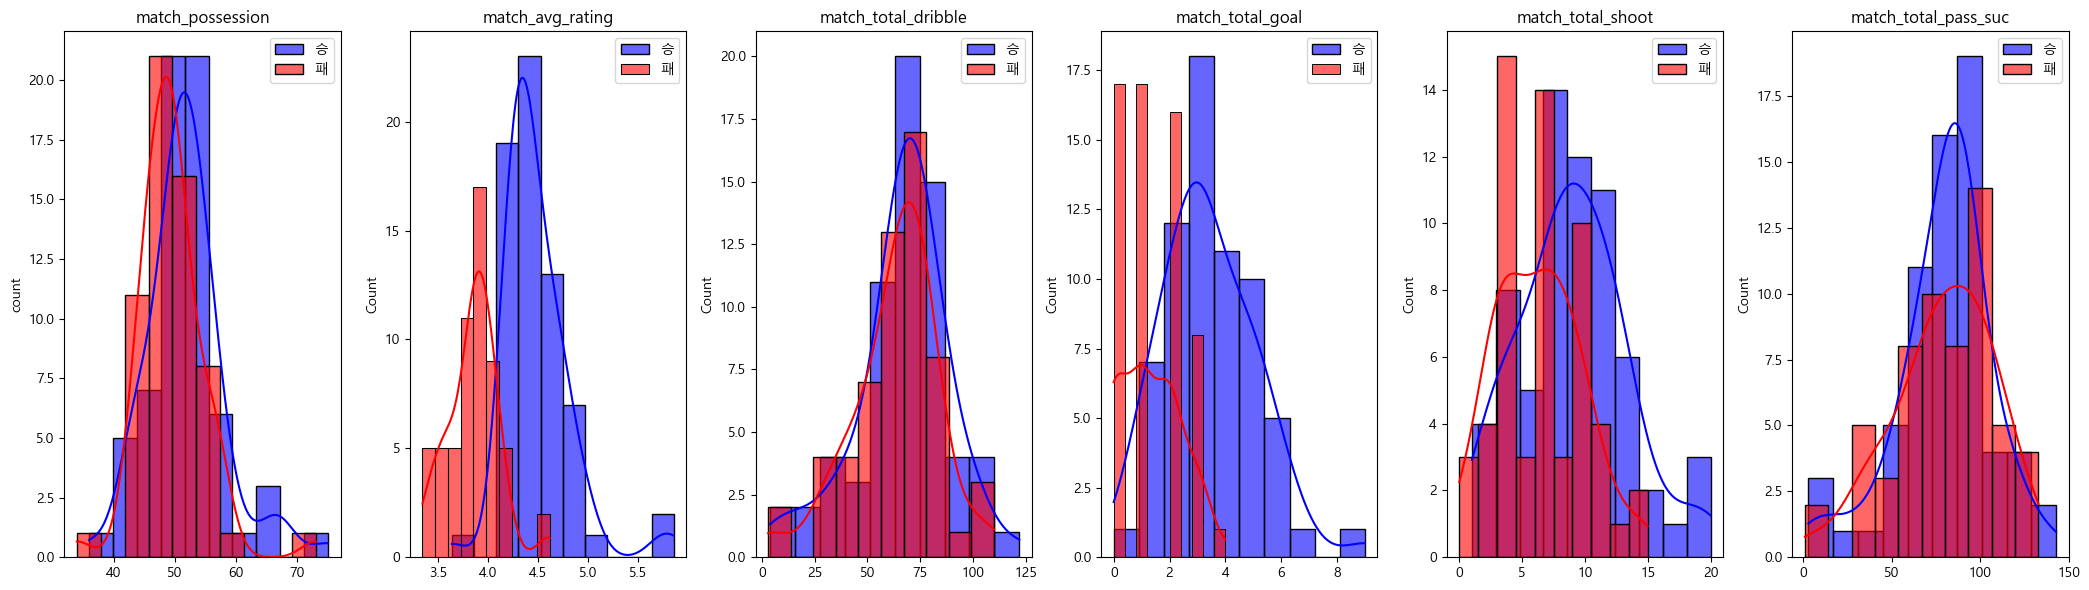

In [159]:
col_hist(df3_win, df3_lose, basic_col)

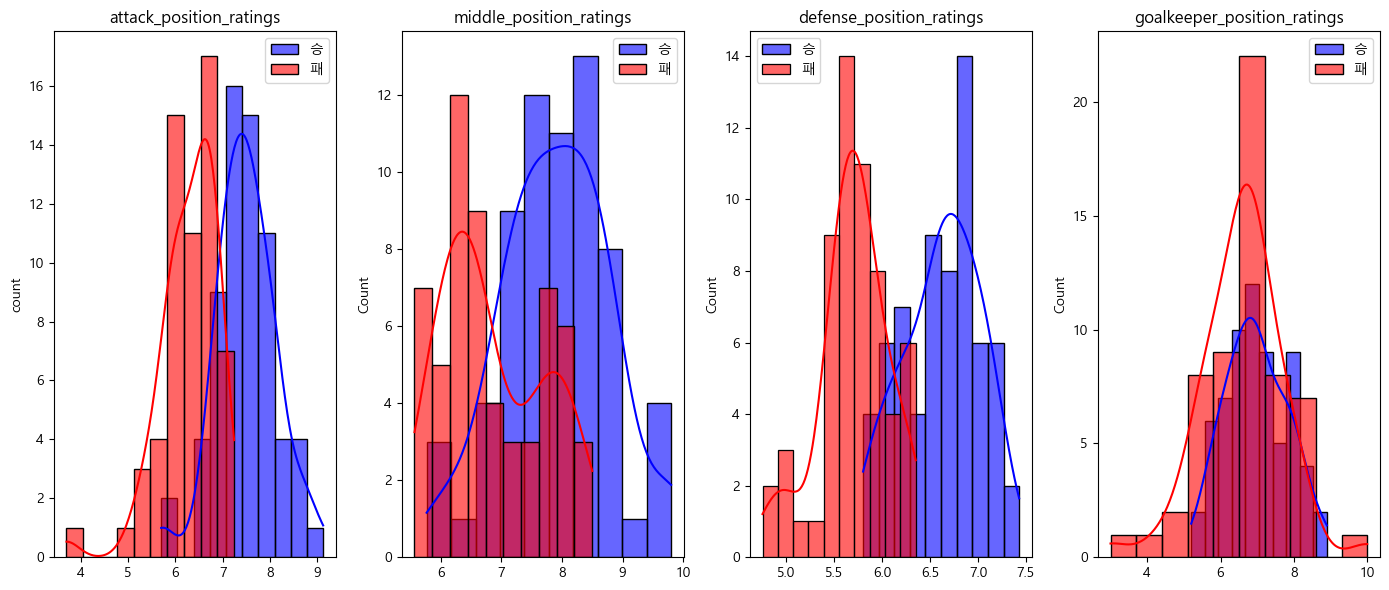

In [160]:
col_hist(df3_win, df3_lose, position_ratings_col)

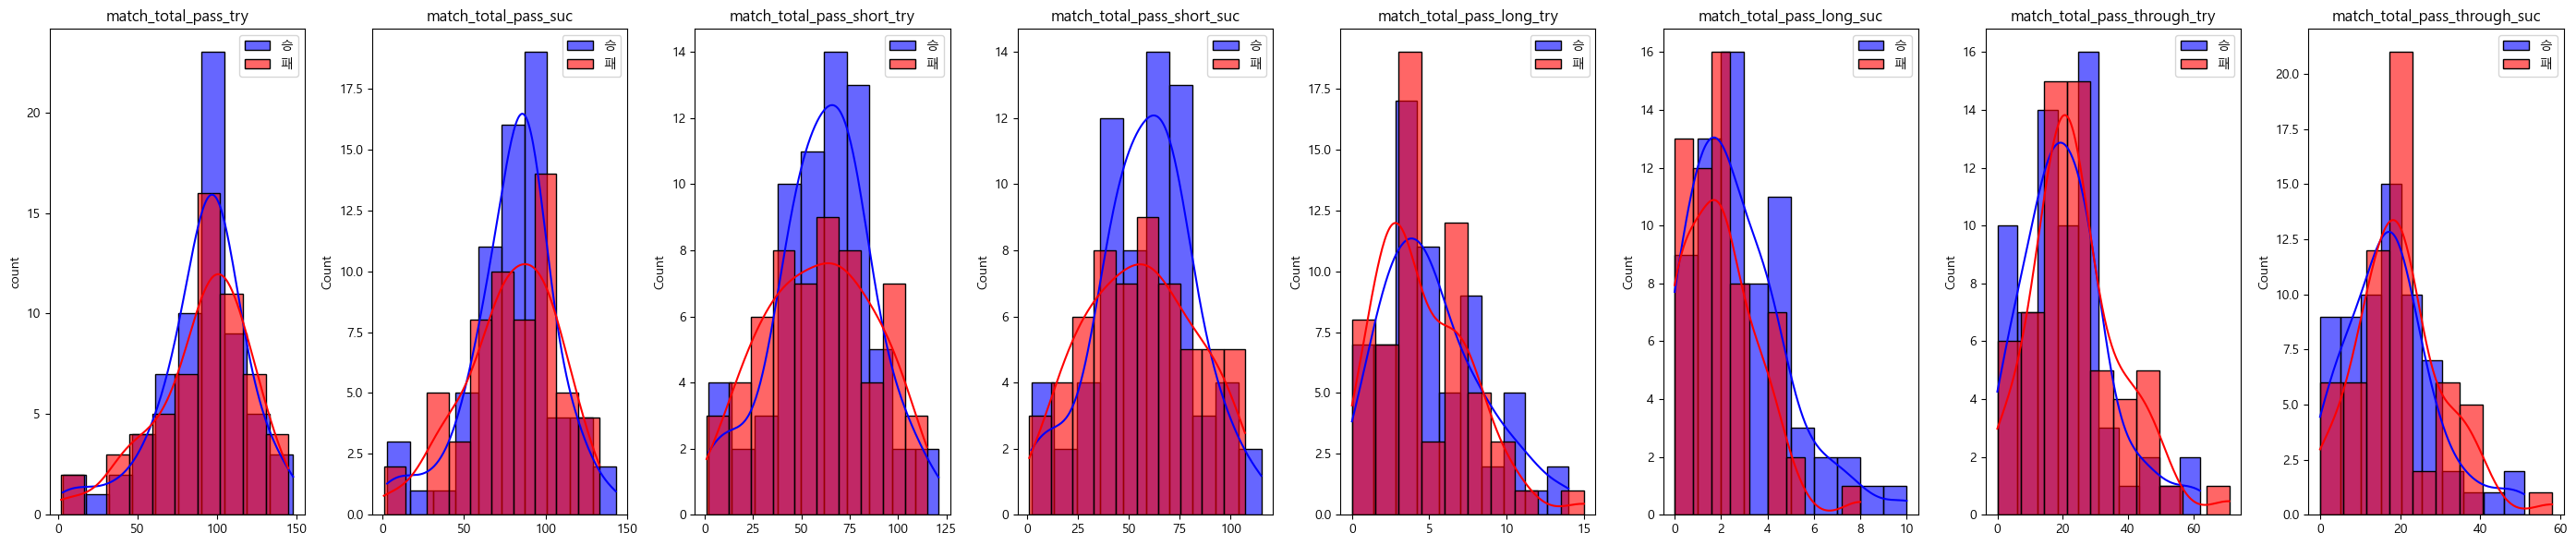

In [161]:
col_hist(df3_win, df3_lose, pass_col)

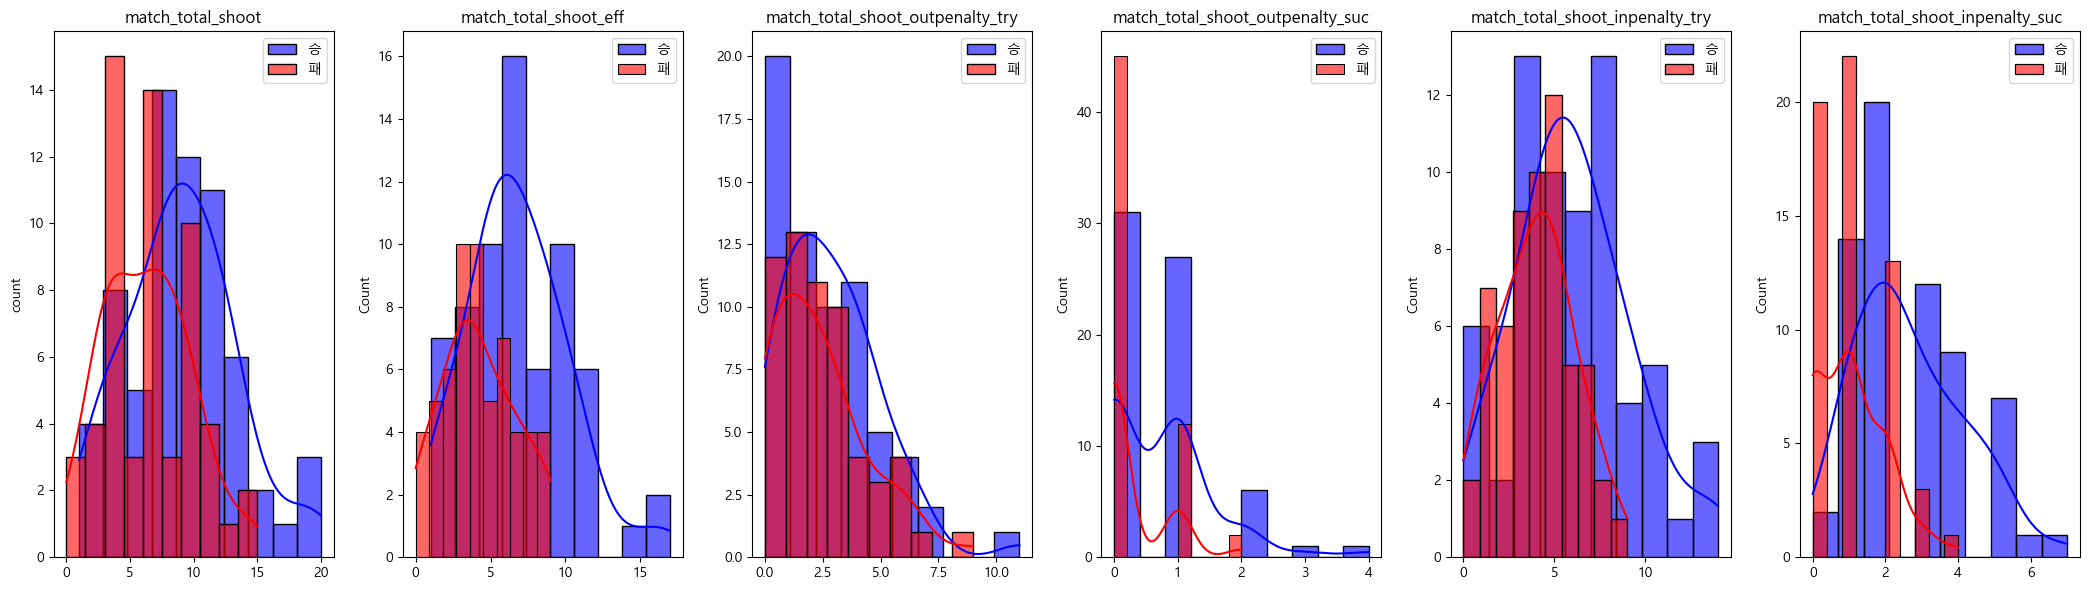

In [162]:
col_hist(df3_win, df3_lose, shoot_col)

## 경기 결과에 따른 Stat별  Box-Plot

In [163]:
def col_boxplot(_df_win, _df_lose, _col_name, _sharey_bool = False) : 

    title_list = ['승', '패']

    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6), 
                           sharey = _sharey_bool)
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        data_to_plot = [_df_win[col].values, _df_lose[col].values]
        ax[idx].boxplot(data_to_plot, tick_labels = title_list);  

        ax[idx].set_xticks([i for i in range(1, len(title_list) + 1)])
        ax[idx].set_xticklabels(title_list)

        ax[idx].set_title(_col_name[idx])

### 결과에 따른 Basic Stats

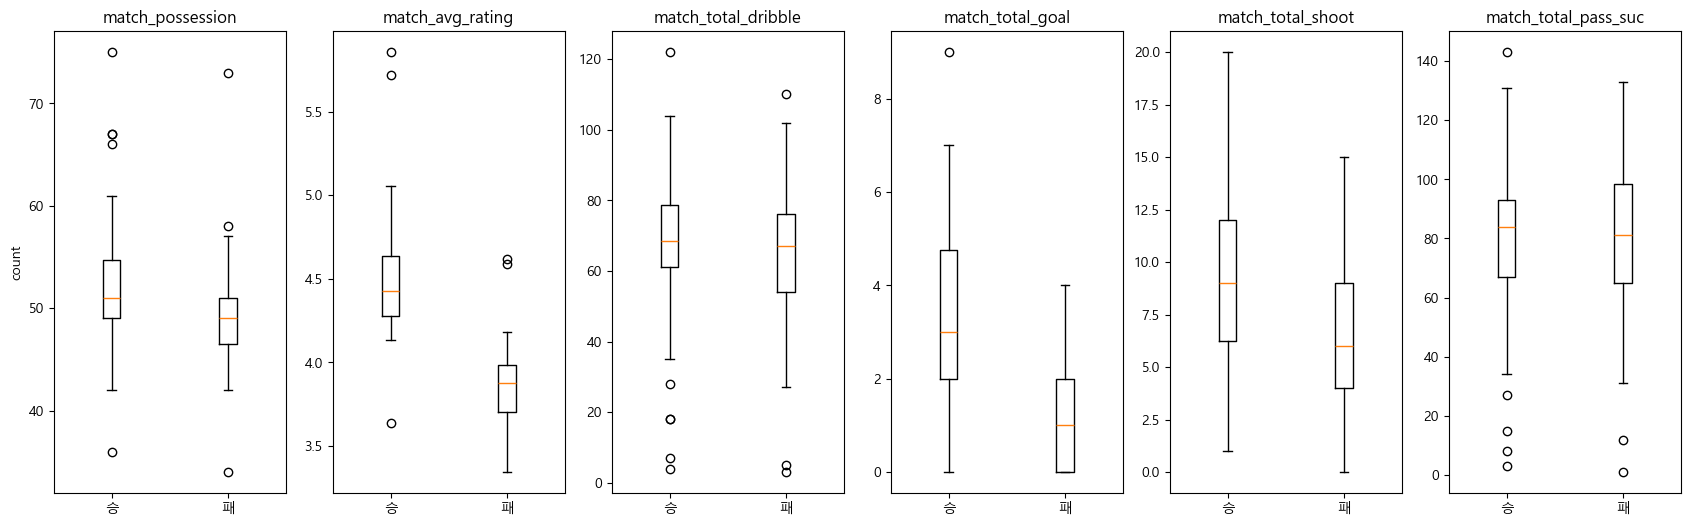

In [165]:
col_boxplot(df3_win, df3_lose, basic_col)

### 승, 패에  따른 Position 별 Ratings

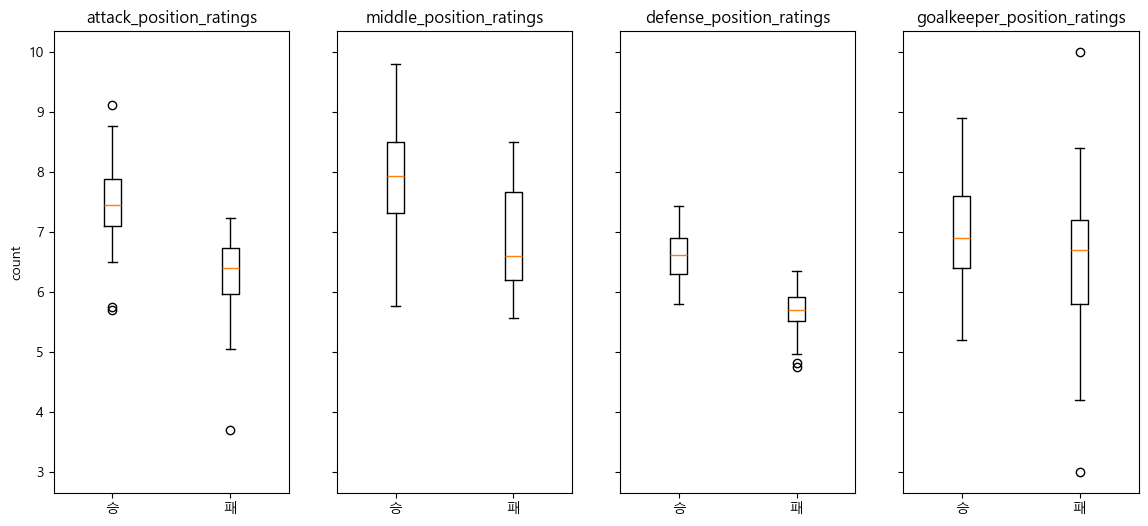

In [166]:
col_boxplot(df3_win, df3_lose, position_ratings_col, True)

### 승, 패에 따른 Pass stats

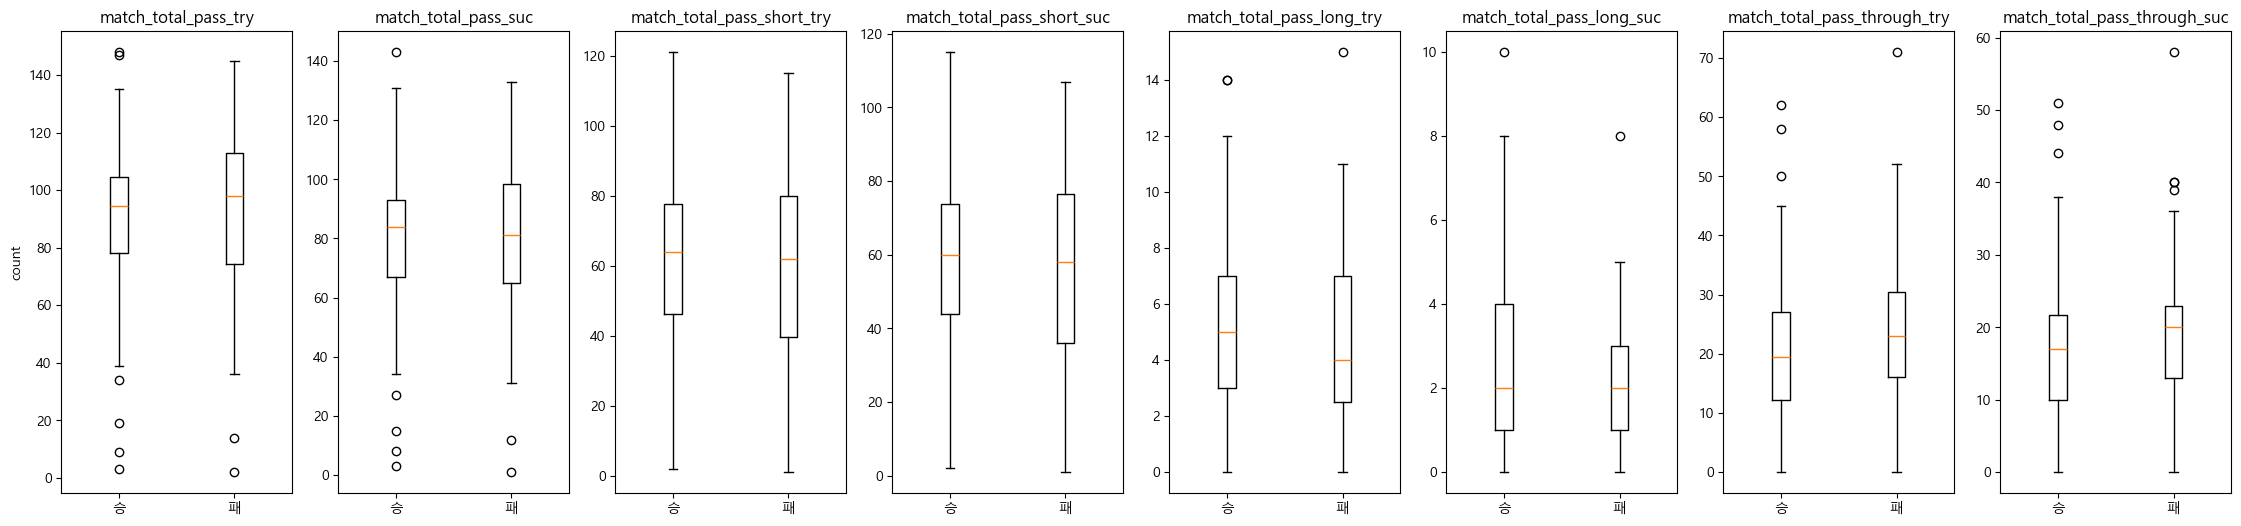

In [169]:
col_boxplot(df3_win, df3_lose, pass_col)

### 경기 결과에 따른 Shoot stats

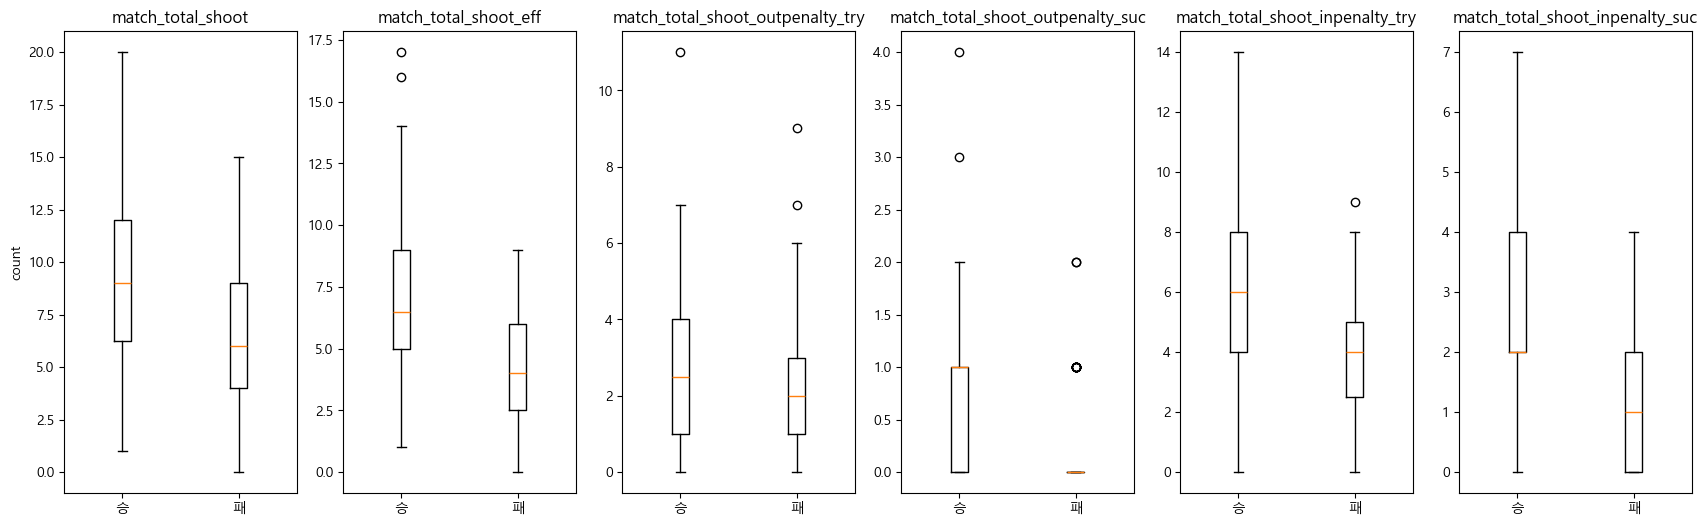

In [170]:
col_boxplot(df3_win, df3_lose, shoot_col)

---

In [171]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu, kstest, norm, probplot

from sklearn.preprocessing import power_transform

In [172]:
df3_qq = df3.copy()

## Stat별 QQ plot

In [173]:
def col_qqplot_all(_df, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        stats.probplot(_df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(_col_name[idx])

    plt.tight_layout()
    plt.show()

In [181]:
def col_qqplot_norm_all(_df, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')
    
    for idx, col in enumerate(_col_name):
        _df[col] = power_transform(_df[col].values.reshape(-1, 1), method = 'yeo-johnson')

        stats.probplot(_df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(_col_name[idx])

    plt.tight_layout()
    plt.show()

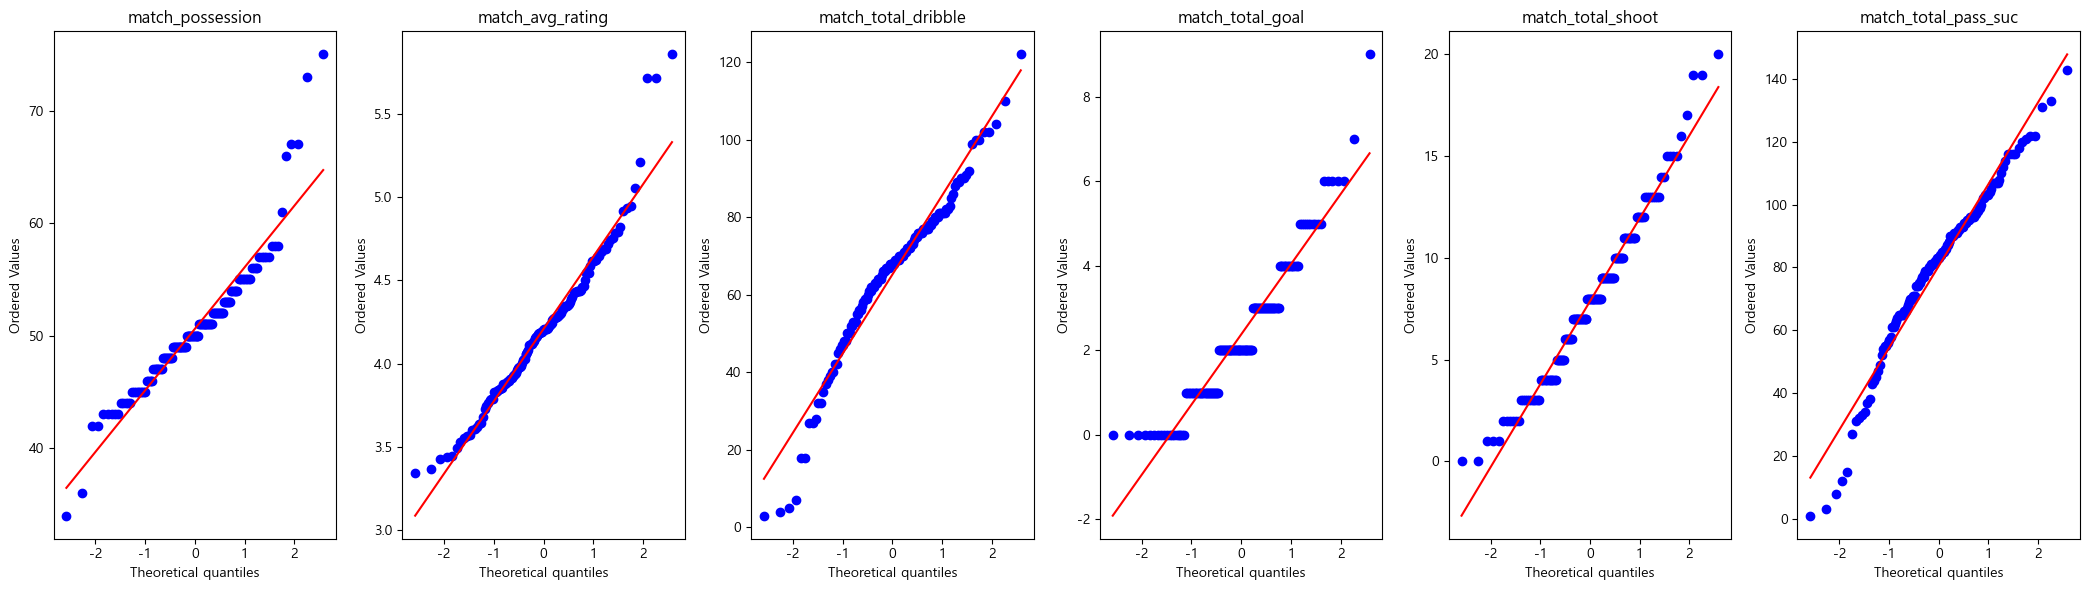

In [182]:
col_qqplot_all(df3, basic_col)

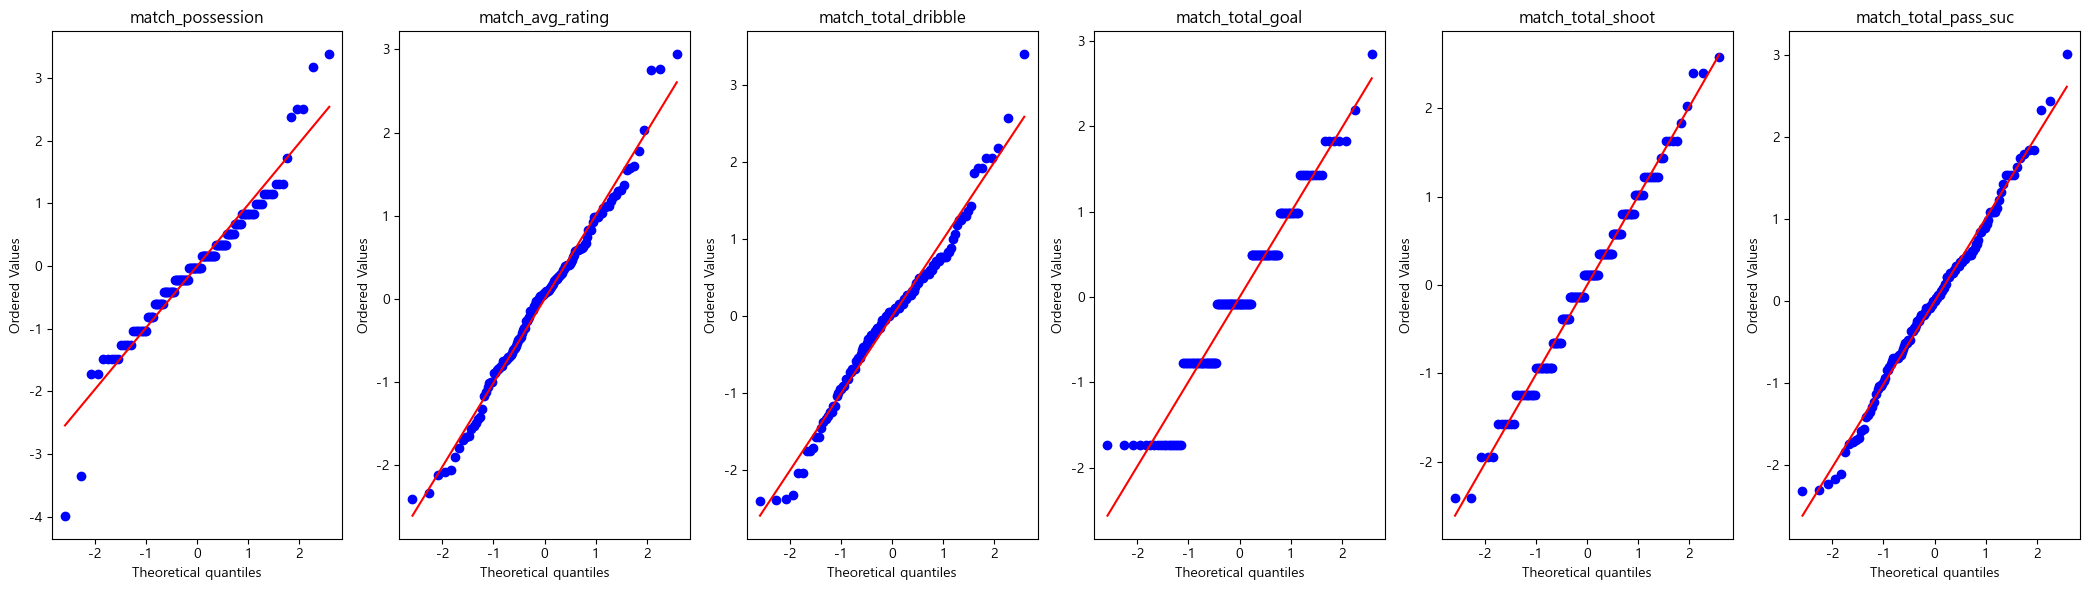

In [183]:
col_qqplot_norm_all(df3_qq, basic_col)

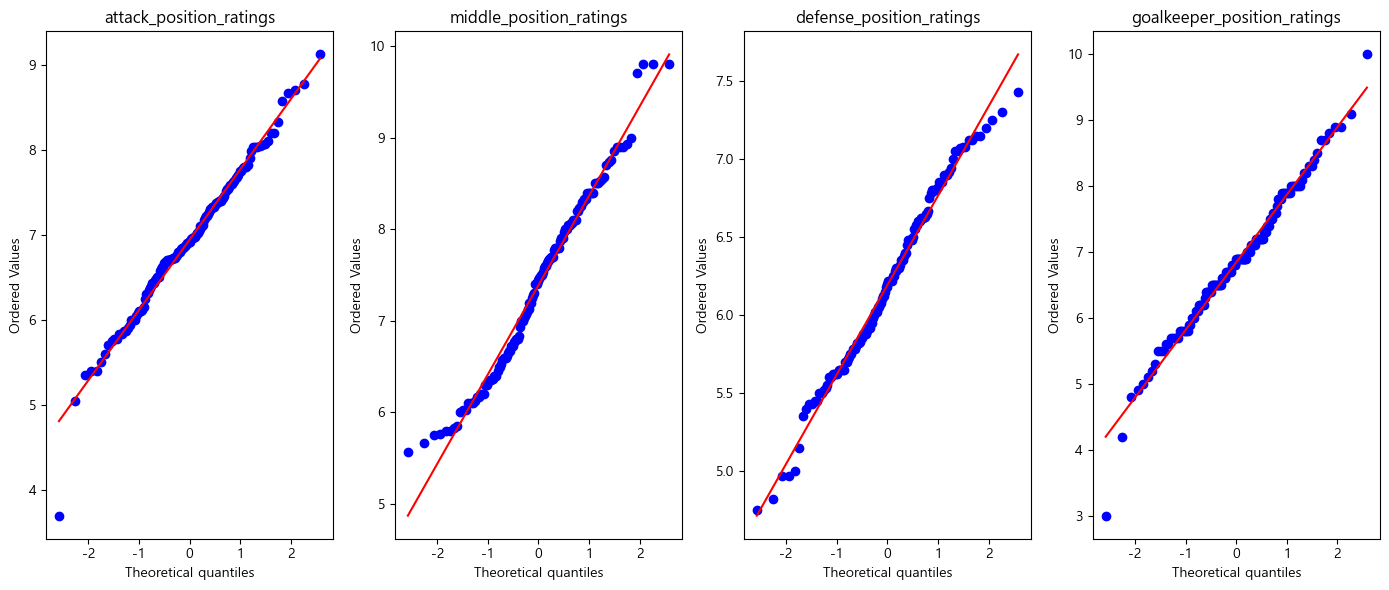

In [184]:
col_qqplot_all(df3, position_ratings_col)

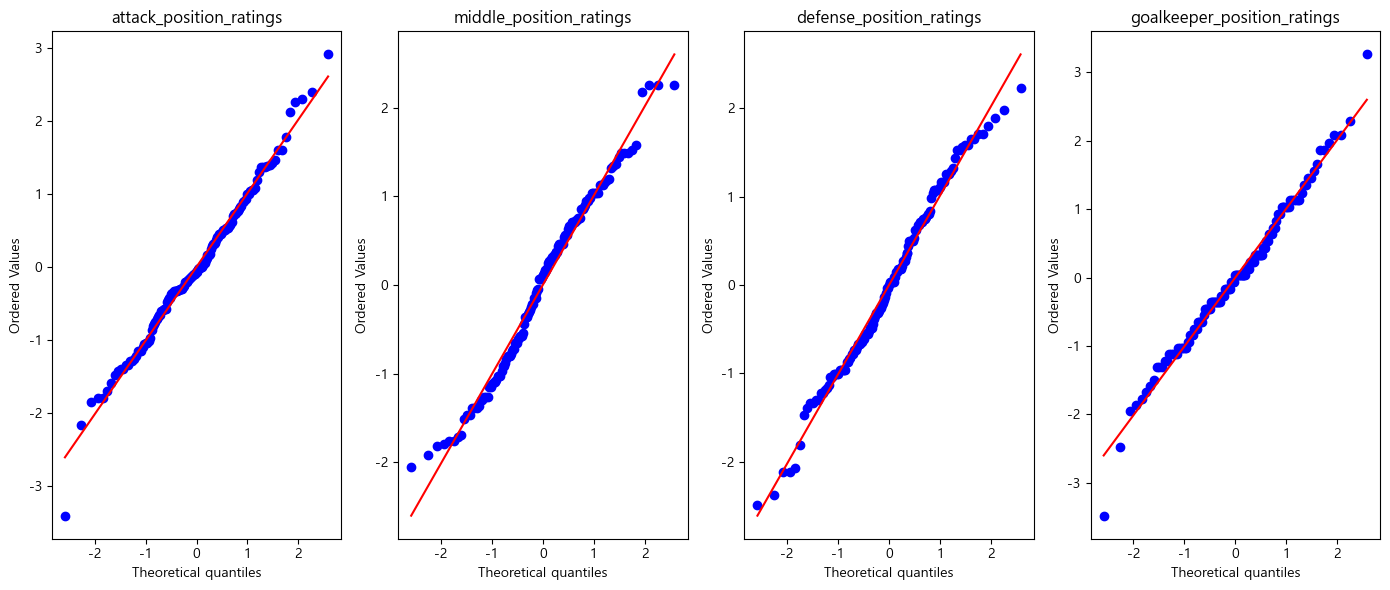

In [185]:
col_qqplot_norm_all(df3_qq, position_ratings_col)

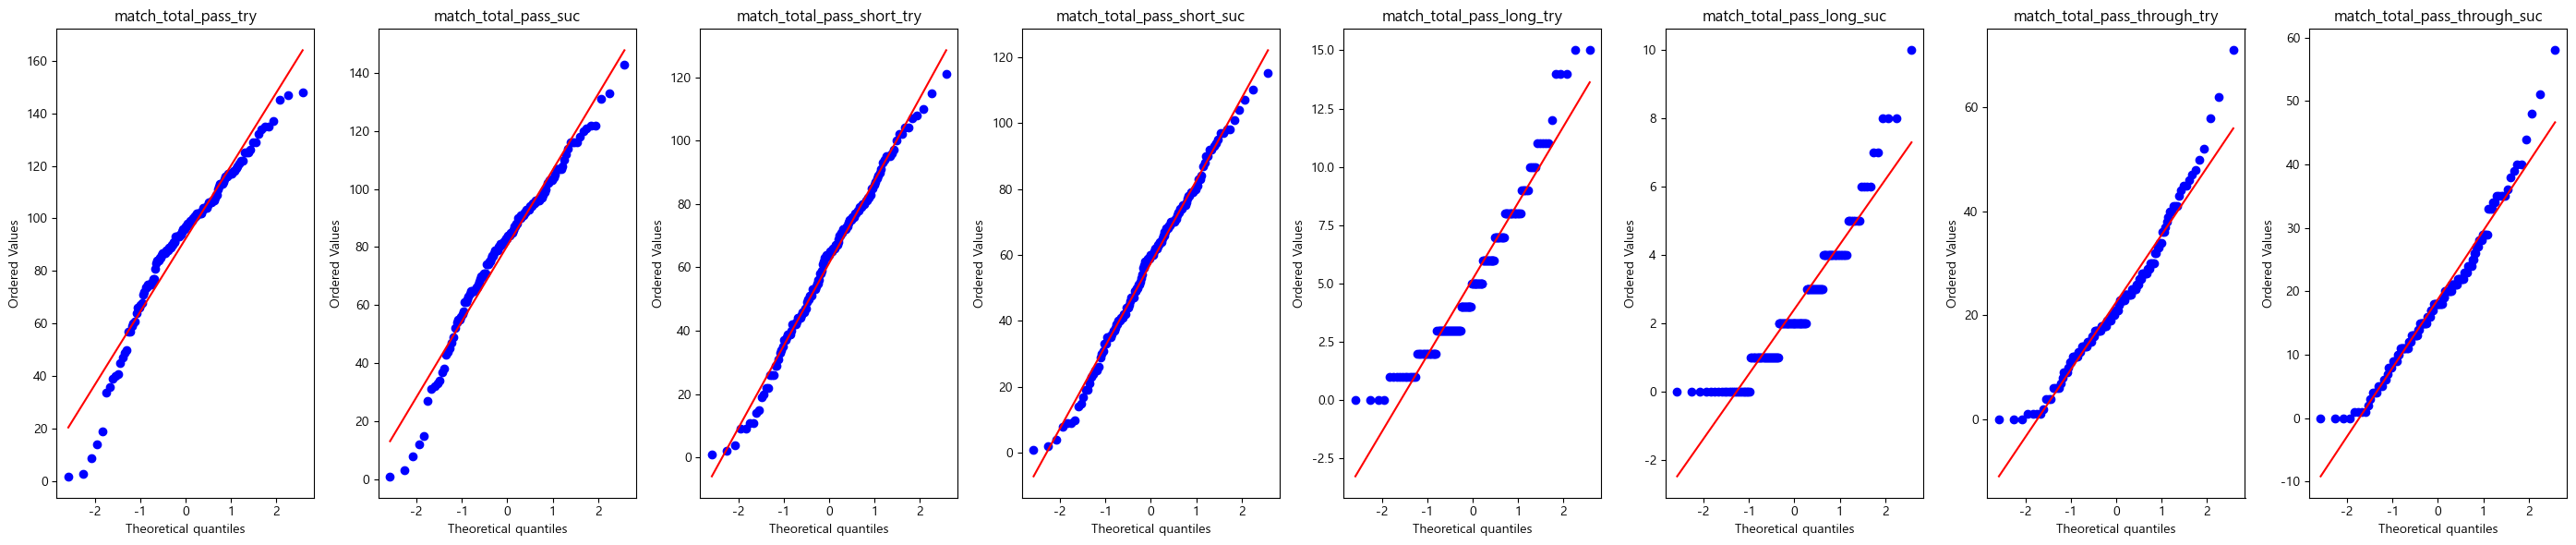

In [186]:
col_qqplot_all(df3, pass_col)

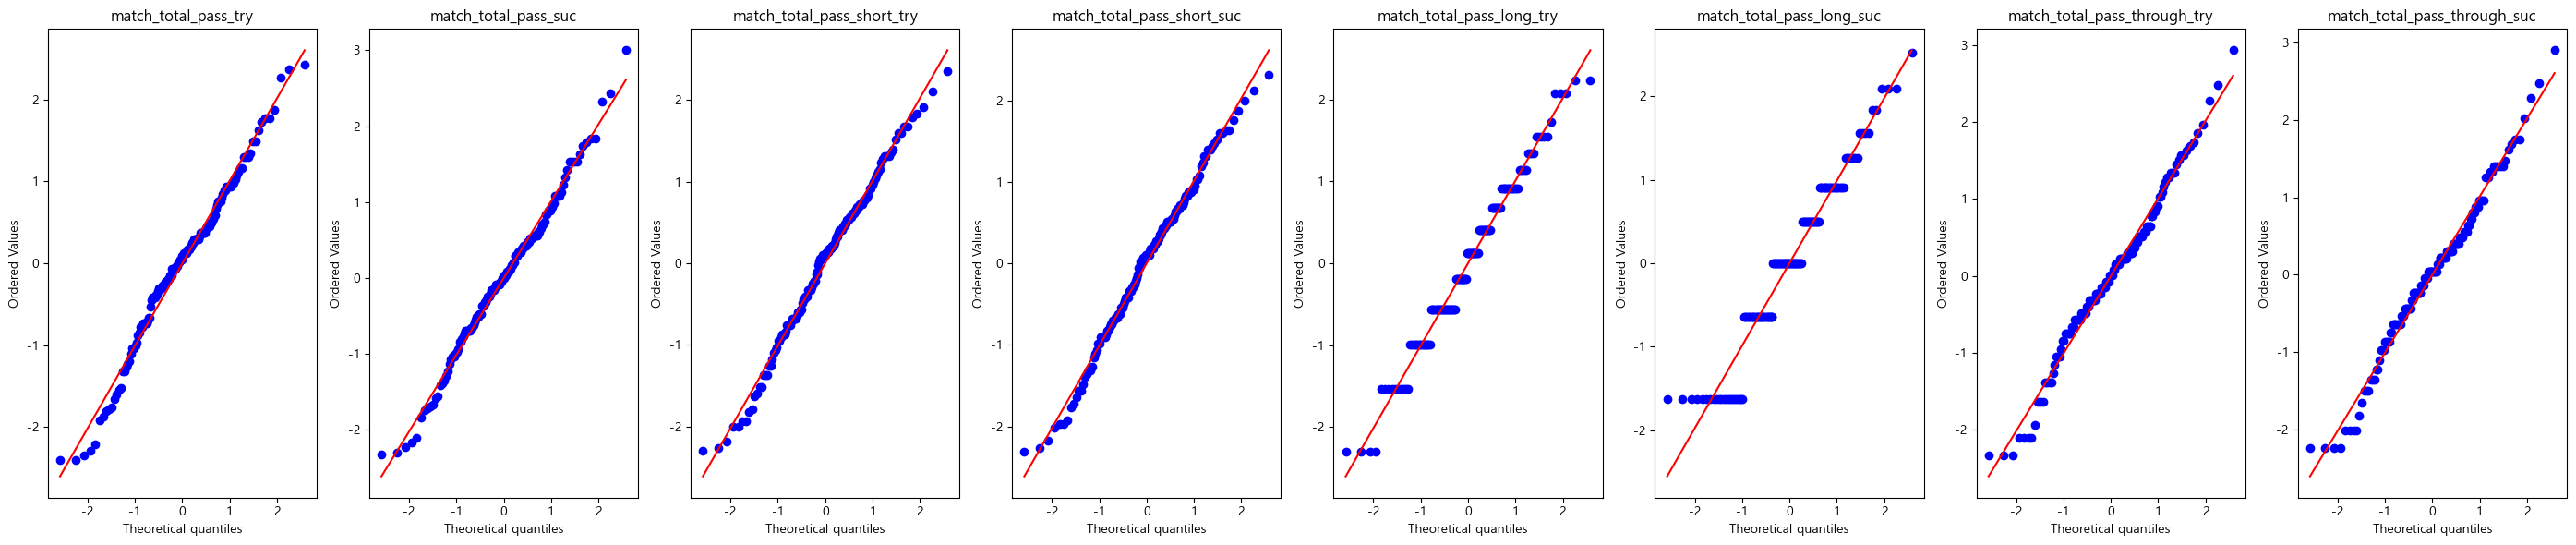

In [187]:
col_qqplot_norm_all(df3_qq, pass_col)

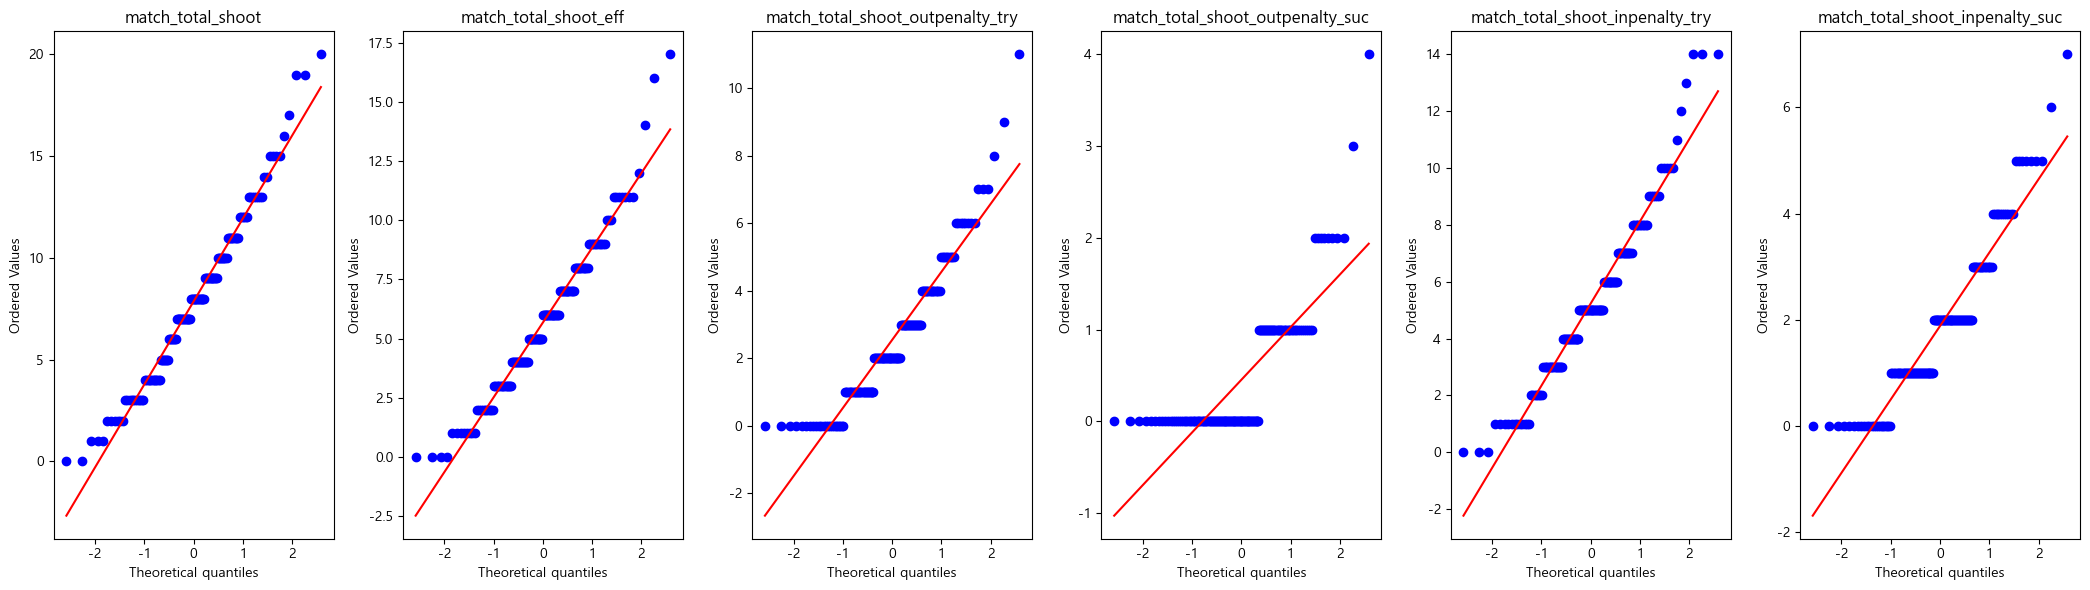

In [188]:
col_qqplot_all(df3, shoot_col)

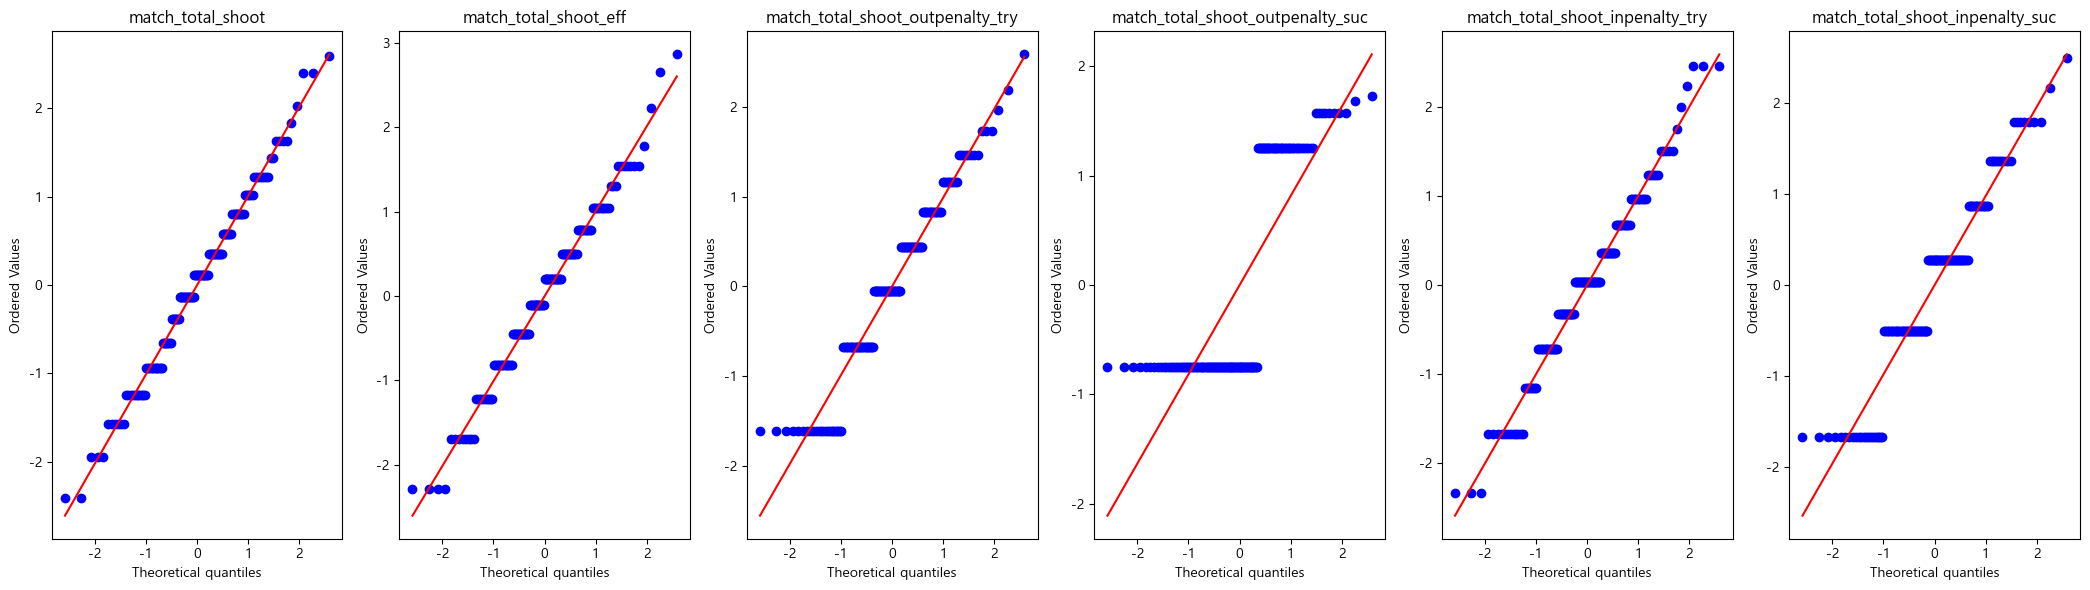

In [189]:
col_qqplot_norm_all(df3_qq, shoot_col)

In [190]:
df3_qq_win = df3_qq[df3_qq['match_result'] == '승']
df3_qq_lose = df3_qq[df3_qq['match_result'] == '패']

---

---

In [195]:
# 1. 정규성 검정 (Shapiro-Wilk test)
def normality_test(_df, _df_win, _df_lose, _columns):
    columns_normality_O = []
    columns_normality_X = []
    
    columns_homogeneity_O = []
    columns_homogeneity_X = []

    for col in _columns:
        stat_shap, p_val_shap = shapiro(_df[col])
        stat_win_shap, p_val_win_shap = shapiro(_df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(_df_lose[col])
        
        stat_kosm, p_val_kosm = kstest(_df[col], 'norm', args = (_df[col].mean(), _df[col].std()))
        stat_win_kosm, p_val_win_kosm = kstest(_df_win[col], 'norm', args = (_df_win[col].mean(), _df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(_df_lose[col], 'norm', args = (_df_lose[col].mean(), _df_lose[col].std()))
        
        stat, p_val = levene(_df_win[col], _df_lose[col])

        # print(f'{col} \n 정규성 검정: \n 전체: p-value={p_val_shap} \
        #                              \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
        #                              \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
        #                              \n Levene’s test p-value={p_val}')
              
        if p_val_shap > 0.05 or (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05):
            columns_normality_O.append(col) 

        else:
            if p_val_kosm > 0.05 or (p_val_win_kosm > 0.05 and p_val_lose_kosm) > 0.05:
                columns_normality_O.append(col)  

            else:
                columns_normality_X.append(col) 

        # 등분산성 검정 결과
        if p_val > 0.05:
            columns_homogeneity_O.append(col)  
            
        else:
            columns_homogeneity_X.append(col) 

    print('-----------------------------------------------------')
    print(f"정규분포 O: \n {', '.join(columns_normality_O)}")
    print('-----------------------------------------------------')
    print(f"정규분포 X: \n {', '.join(columns_normality_X)}")
    print('-----------------------------------------------------')
    print(f"등분산성 O: \n {', '.join(columns_homogeneity_O)}")
    print('-----------------------------------------------------')
    print(f"등분산성 X: \n {', '.join(columns_homogeneity_X)}")
    print('-----------------------------------------------------')

### 정규화 전 정규성, 등분산성 확인

In [205]:
normality_test(df3, df3_win, df3_lose, basic_col)

-----------------------------------------------------
정규분포 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
정규분포 X: 
 match_total_goal
-----------------------------------------------------
등분산성 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
등분산성 X: 
 match_total_goal
-----------------------------------------------------


In [206]:
normality_test(df3, df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
정규분포 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
정규분포 X: 
 
-----------------------------------------------------
등분산성 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [207]:
normality_test(df3, df3_win, df3_lose, pass_col)

-----------------------------------------------------
정규분포 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
정규분포 X: 
 match_total_pass_long_try, match_total_pass_long_suc
-----------------------------------------------------
등분산성 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [209]:
normality_test(df3, df3_win, df3_lose, shoot_col)

-----------------------------------------------------
정규분포 O: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try
-----------------------------------------------------
정규분포 X: 
 match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try
-----------------------------------------------------
등분산성 X: 
 match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------


### 정규화 이후 정규성, 등분산성 확인

In [214]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, basic_col)

-----------------------------------------------------
정규분포 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
정규분포 X: 
 match_total_goal
-----------------------------------------------------
등분산성 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_goal, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [215]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, position_ratings_col)

-----------------------------------------------------
정규분포 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
정규분포 X: 
 
-----------------------------------------------------
등분산성 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [216]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, pass_col)

-----------------------------------------------------
정규분포 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
정규분포 X: 
 match_total_pass_long_suc
-----------------------------------------------------
등분산성 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [217]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, shoot_col)

-----------------------------------------------------
정규분포 O: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try
-----------------------------------------------------
정규분포 X: 
 match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 X: 
 match_total_shoot_outpenalty_suc
-----------------------------------------------------


In [218]:
def group_difference_test(_df_win, _df_lose, _columns):
    for col in _columns:
        # 정규성 여부에 따라 검정 방법 선택
        stat_win_shap, p_val_win_shap = shapiro(_df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(_df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(_df_win[col], 'norm', args = (_df_win[col].mean(), _df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(_df_lose[col], 'norm', args = (_df_lose[col].mean(), _df_lose[col].std()))
        
        if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05):  # 정규분포를 따를 경우
            stat, p_val = ttest_ind(_df_win[col], _df_lose[col], equal_var = True)  
            test_type = "t-test"
            
        else:  # 정규분포를 따르지 않을 경우
            stat, p_val = mannwhitneyu(_df_win[col], _df_lose[col])
            test_type = "Mann-Whitney U test"
        
        print('-----------------------------------------------------')

        if p_val < 0.05:
            print(f'{col}은(는) 승패에 따라 유의미한 차이가 있음')
        else:
            print(f'{col}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

In [219]:
group_difference_test(df3_win, df3_lose, basic_col)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_avg_rating은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_dribble은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_goal은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX


In [220]:
group_difference_test(df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
attack_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
middle_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
defense_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
goalkeeper_position_ratings은(는) 승패에 따라 유의미한 차이가 있음


In [221]:
group_difference_test(df3_win, df3_lose, shoot_col)

-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_eff은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


In [222]:
group_difference_test(df3_win, df3_lose, pass_col)

-----------------------------------------------------
match_total_pass_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_short_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX


---

In [225]:
list(df2_temp.columns)

['match_total_pass_short_suc',
 'match_total_pass_long_suc',
 'match_total_pass_through_try',
 'match_total_shoot_outpenalty_try',
 'match_total_shoot_outpenalty_suc',
 'match_total_shoot_inpenalty_try',
 'match_total_shoot_inpenalty_suc']

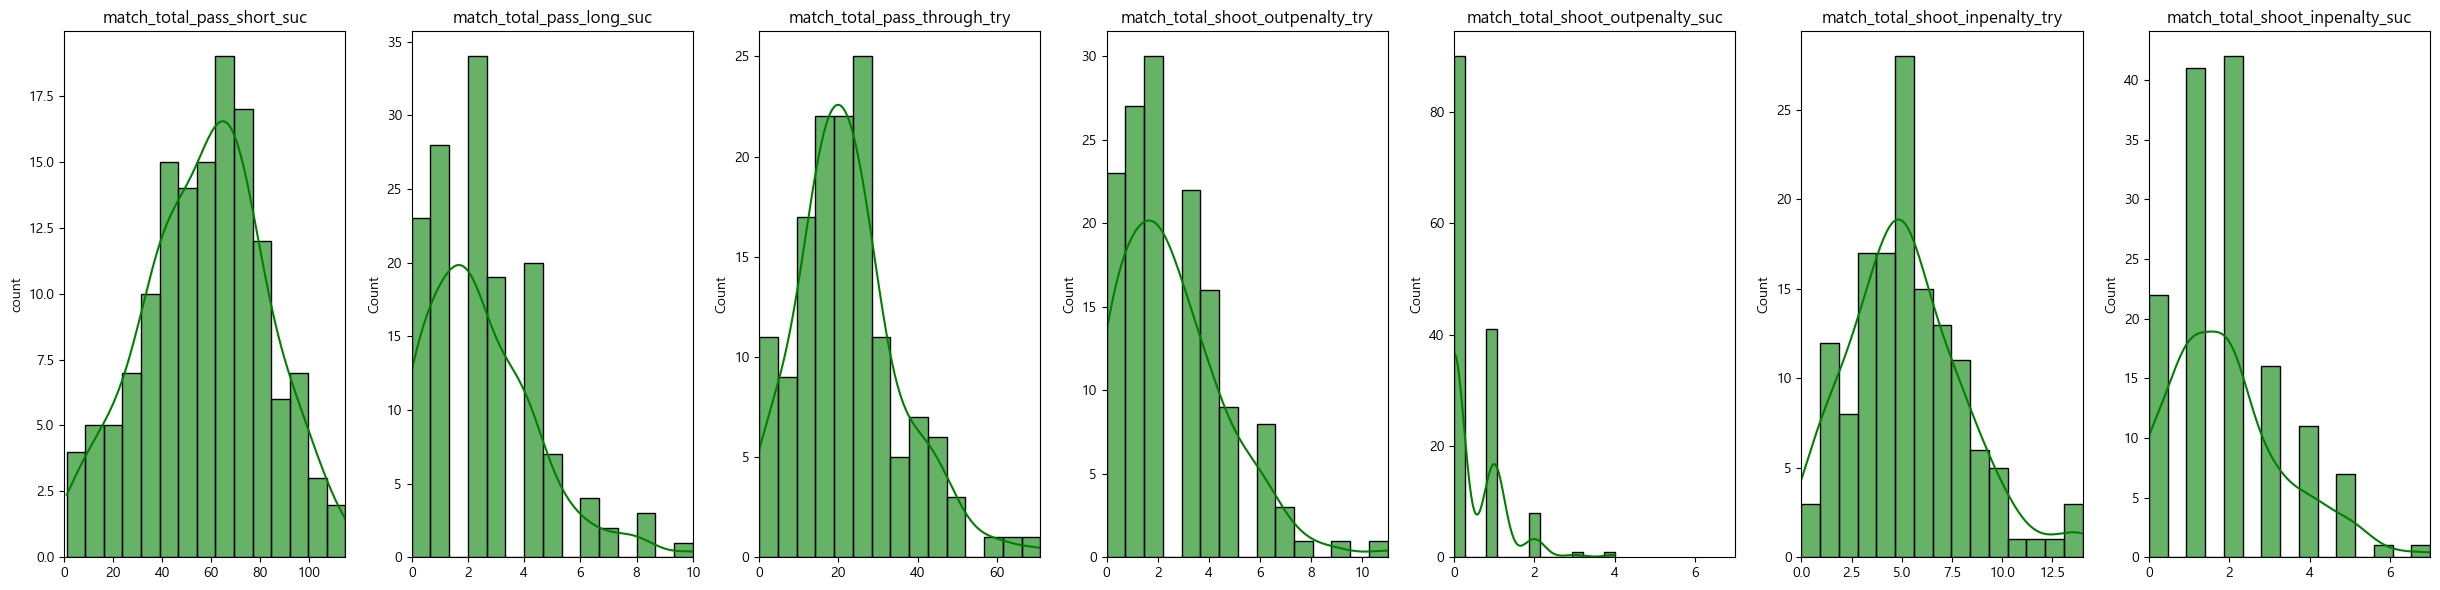

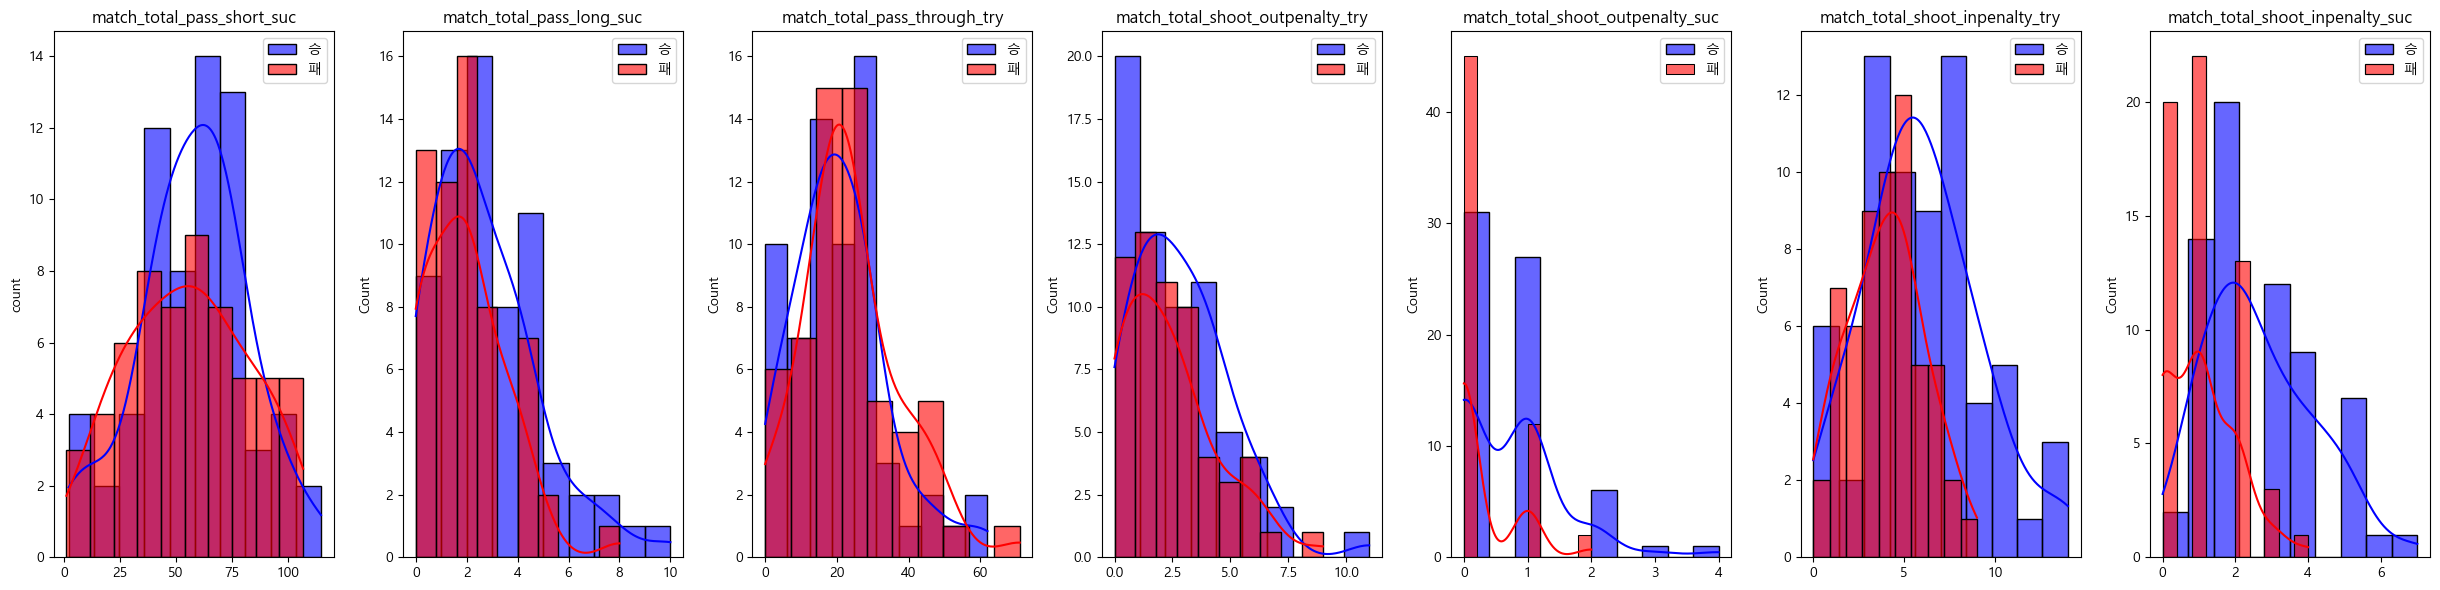

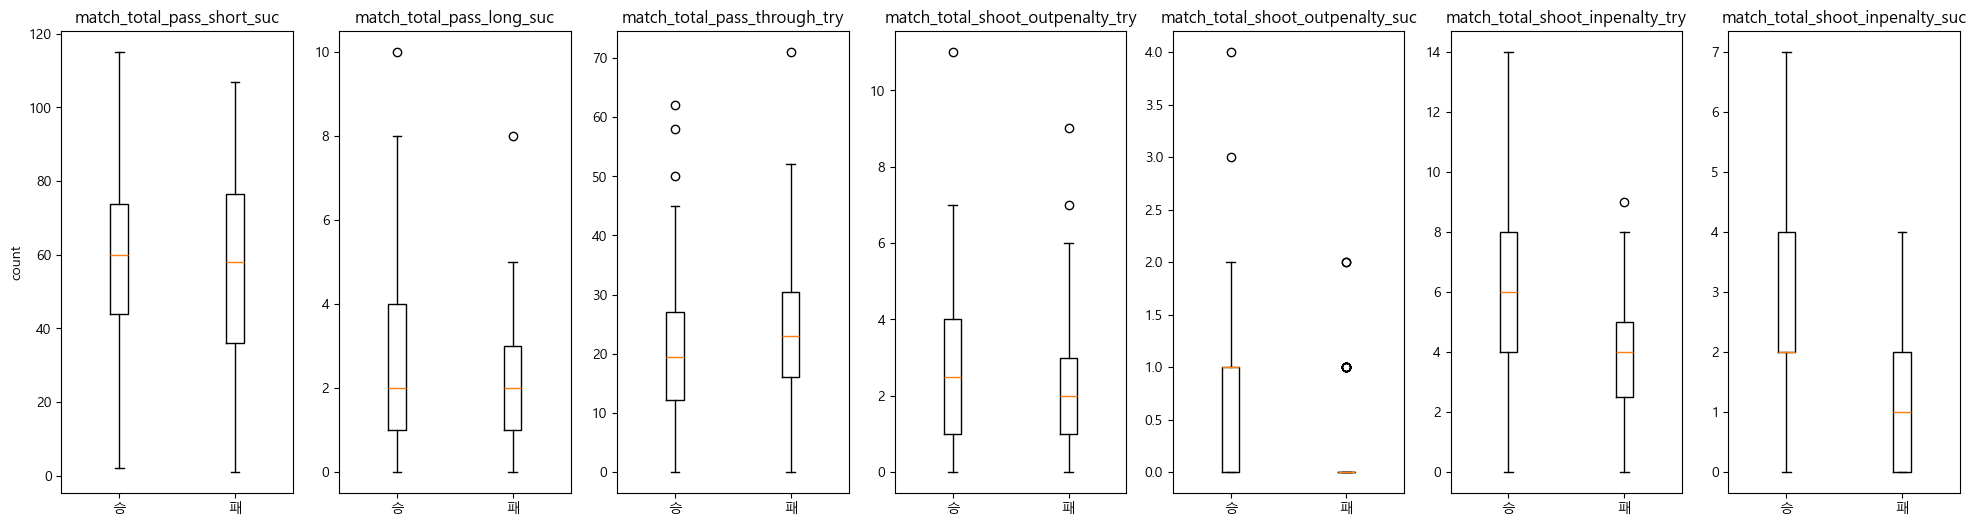

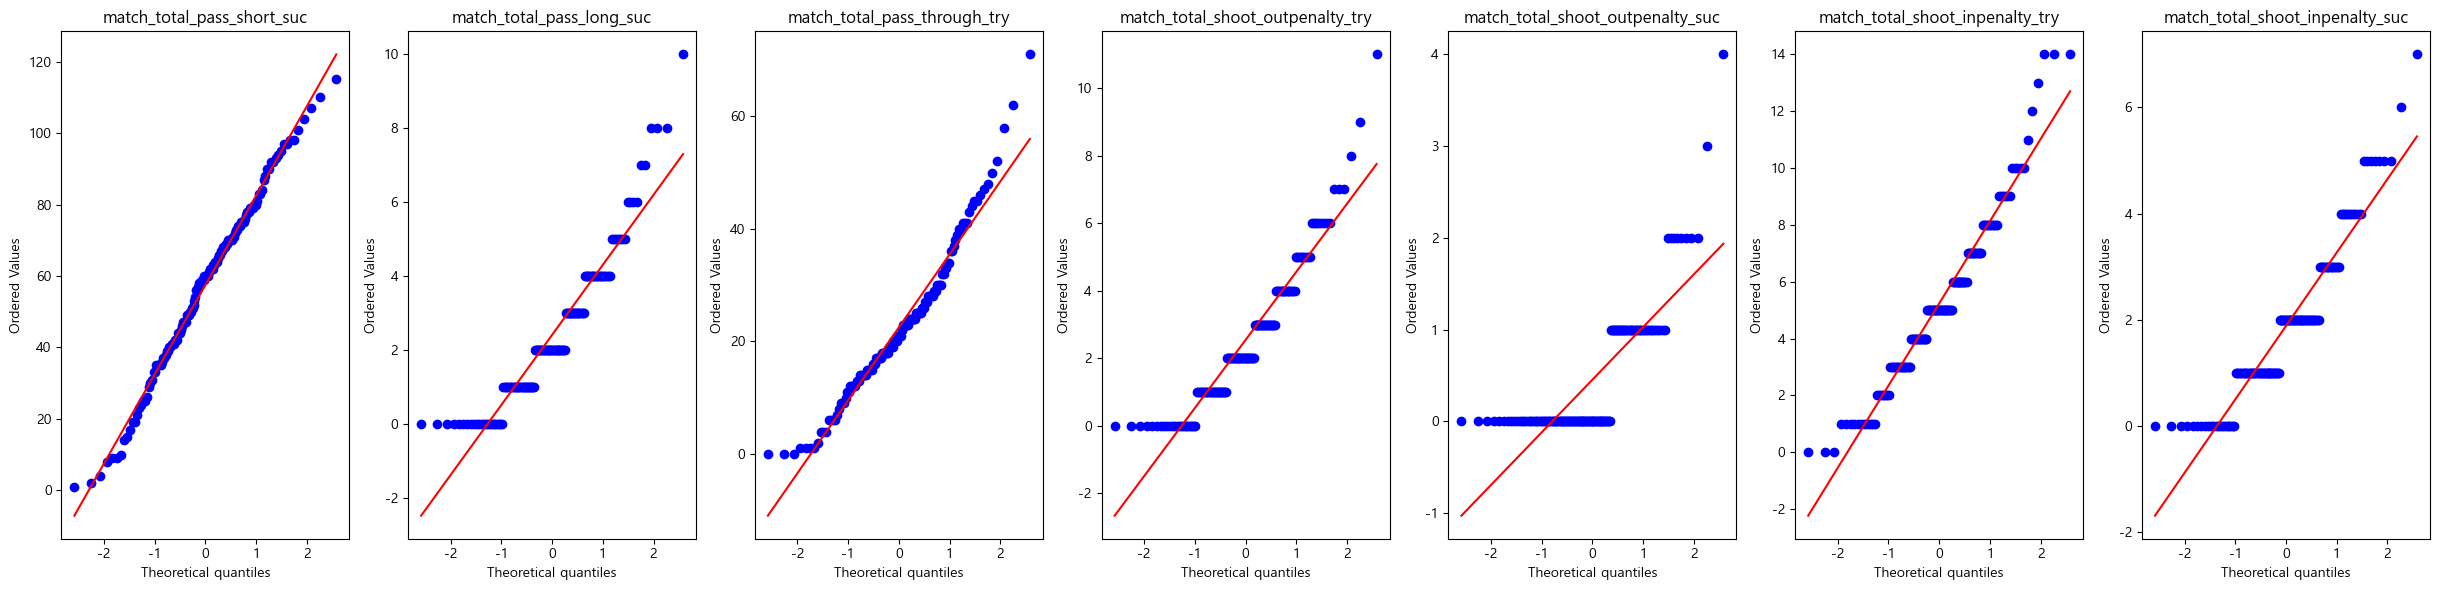

In [226]:
df4 = df1[['match_result'] + list(df2_temp.columns)]

df4_win = df4[df4['match_result'] == '승']
df4_lose = df4[df4['match_result'] == '패']

df4_temp = df4.drop(columns = ['match_result'])

col_hist_all(df4_temp, df4_temp.columns);
col_hist(df4_win, df4_lose, df4_temp.columns);
col_boxplot(df4_win, df4_lose, df4_temp.columns, False);
col_qqplot_all(df4_temp, df4_temp.columns);

In [228]:
normality_test(df4, df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
정규분포 O: 
 match_total_pass_short_suc, match_total_pass_through_try, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try
-----------------------------------------------------
정규분포 X: 
 match_total_pass_long_suc, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 match_total_pass_short_suc, match_total_pass_long_suc, match_total_pass_through_try, match_total_shoot_outpenalty_try
-----------------------------------------------------
등분산성 X: 
 match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------


In [229]:
group_difference_test(df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


---

# PRACTICE

In [62]:
# match_total_goal, match_possession, match_total_shoot_inpenalty_try, 
# match_total_pass_short_try, match_total_pass_long_try, match_total_pass_through_try
# match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try

column_name = 'match_total_shoot_inpenalty_try'

temp_query = f"SELECT match_result, {column_name} FROM match_user;"
df_temp = pd.read_sql(temp_query, con = engine);

df_temp[column_name] += 0.1
df_temp[f'{column_name}_boxcox'] = stats.boxcox(df_temp[column_name])[0] 

x = df_temp[column_name]
x_win = df_temp[df_temp['match_result'] == '승'][column_name]
x_lose = df_temp[df_temp['match_result'] == '패'][column_name]

y = df_temp[f'{column_name}_boxcox'] 
y_win = df_temp[df_temp['match_result'] == '승'][f'{column_name}_boxcox'] 
y_lose = df_temp[df_temp['match_result'] == '패'][f'{column_name}_boxcox'] 

2024-12-19 19:37:48,316 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:48,317 INFO sqlalchemy.engine.Engine [cached since 23.27s ago] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;'}
2024-12-19 19:37:48,319 INFO sqlalchemy.engine.Engine SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;
2024-12-19 19:37:48,320 INFO sqlalchemy.engine.Engine [raw sql] {}


In [63]:
print(shapiro(x))
print(kstest(x, 'norm', args=(x.mean(), x.std())))

if shapiro(x).pvalue > 0.05 :
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if kstest(x, 'norm', args=(x.mean(), x.std())).pvalue > 0.05 : 
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_win))
print(kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())))

if shapiro(x_win).pvalue > 0.05 :
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())).pvalue > 0.05 : 
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_lose))
print(kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())))

if shapiro(x_lose).pvalue > 0.05 :
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())).pvalue > 0.05 : 
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
stat_win_shap, p_val_win_shap = shapiro(y_win)
stat_lose_shap, p_val_lose_shap = shapiro(y_lose)

stat_win_kosm, p_val_win_kosm = kstest(y_win, 'norm', args=(y_win.mean(), y_win.std()))
stat_lose_kosm, p_val_lose_kosm = kstest(y_lose, 'norm', args=(y_lose.mean(), y_lose.std()))

stat, p_val = levene(y_win, y_lose)

print(f'{column_name} \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                \n Levene’s test p-value={p_val}')

if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

if p_val > 0.05:
    print(f'{column_name}은(는) 등분산을 따른다고 볼 수 있음')
else:
    print(f'{column_name}은(는) 등분산을 따르지 않음')

if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05): 
    stat, p_val = ttest_ind(y_win, y_lose, equal_var=True)
    test_type = "t-test"
    
else:  
    stat, p_val = mannwhitneyu(y_win, y_lose)
    test_type = "Mann-Whitney U test"

if p_val < 0.05:
    print(f'{column_name}은(는) 승패에 따라 유의미한 차이가 있음')
else:
    print(f'{column_name}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

ShapiroResult(statistic=0.6068821114896326, pvalue=1.6693034088821562e-62)
KstestResult(statistic=0.26226460879254326, pvalue=9.828532862056203e-173, statistic_location=0.1, statistic_sign=-1)
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6597235089040101, pvalue=1.1865033090730458e-47)
KstestResult(statistic=0.21875897799363542, pvalue=8.344331102622533e-64, statistic_location=3.1, statistic_sign=1)
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6095004387681483, pvalue=1.3331822278179532e-47)
KstestResult(statistic=0.3993146539382591, pvalue=5.1681671625538594e-192, statistic_location=0.1, statistic_sign=1)
match_total_shoot_inpenalty_try_lose 은(는) 정규분포를 따르지 않음, _shap
match_tota

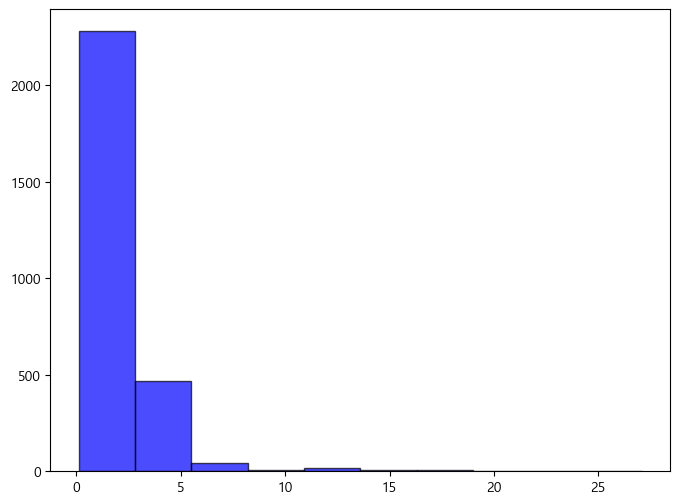

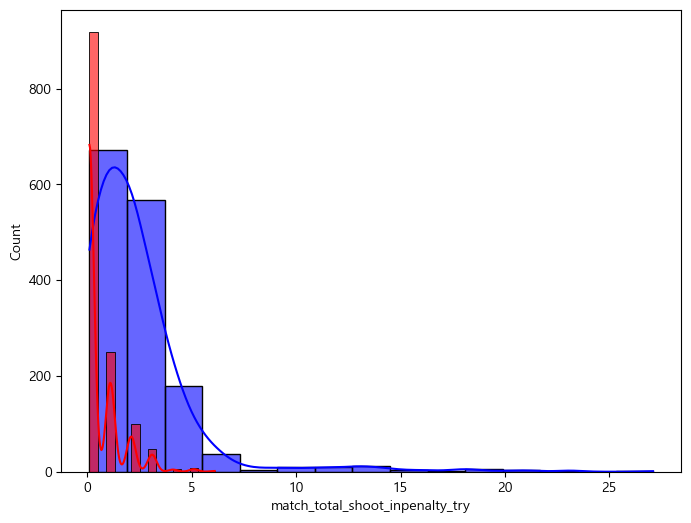

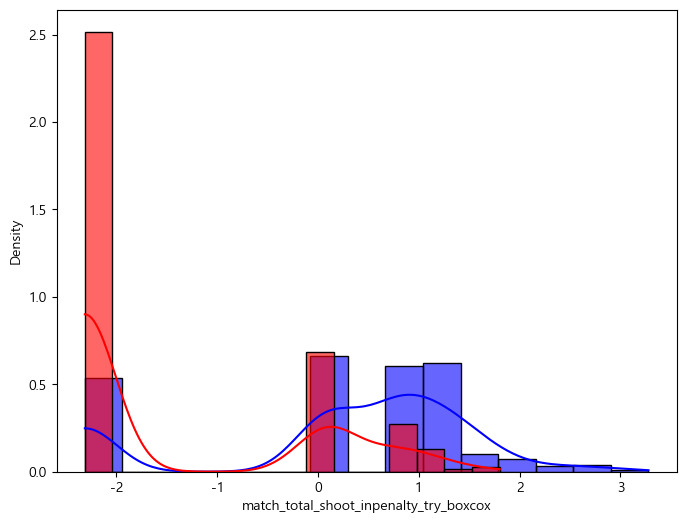

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))  

ax.hist(x, color='blue', alpha=0.7, edgecolor='black')

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(x_win, color='blue', bins = 15, kde=True, ax=ax, label='승', alpha=0.6);
sns.histplot(x_lose, color='red', bins = 15, kde=True, ax=ax, label='패', alpha=0.6);

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(y_win, color='blue', bins = 15, kde=True, ax=ax, label='승', stat="density", alpha=0.6);
sns.histplot(y_lose, color='red', bins = 15, kde=True, ax=ax, label='패', stat="density", alpha=0.6);

---

In [133]:
df3_position_temp = df3[['match_result'] + position_ratings_col].copy()

In [134]:
df3_position_temp = df3_position_temp[df3_position_temp['attack_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['middle_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['defense_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['goalkeeper_position_ratings'] != 10]

In [135]:
df3_position_temp_qq = df3_position_temp.copy()

In [136]:
df3_position_temp_win = df3_position_temp[df3_position_temp['match_result'] == '승']
df3_position_temp_lose = df3_position_temp[df3_position_temp['match_result'] == '패']

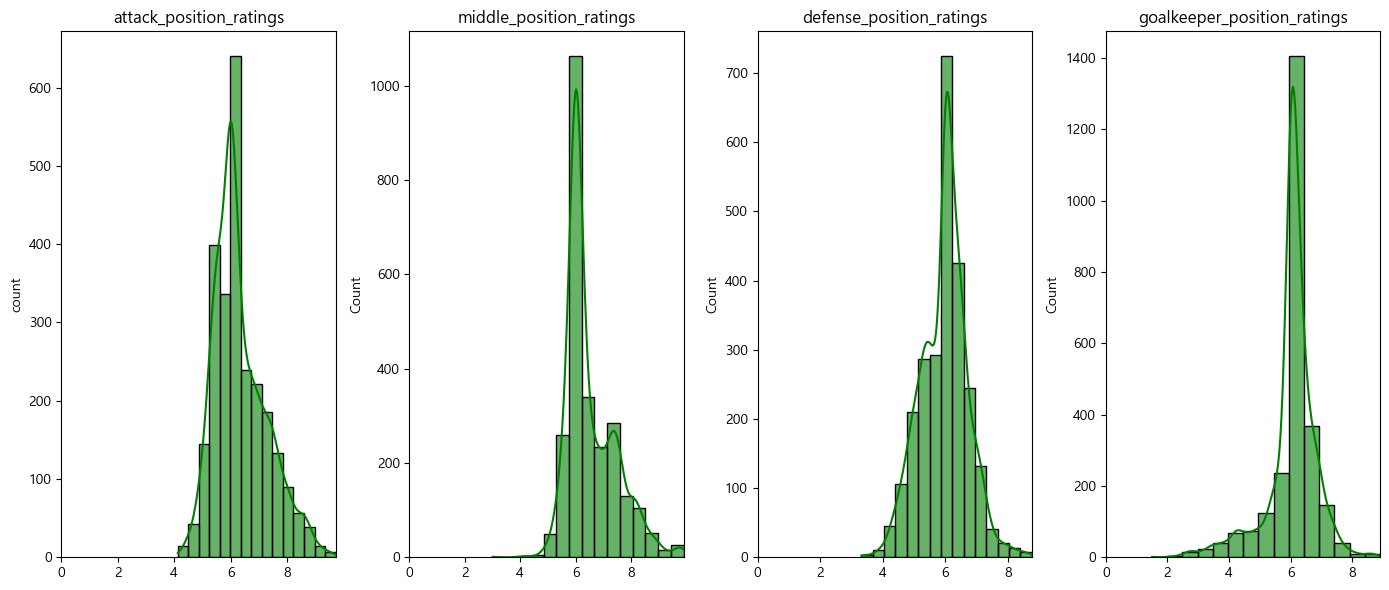

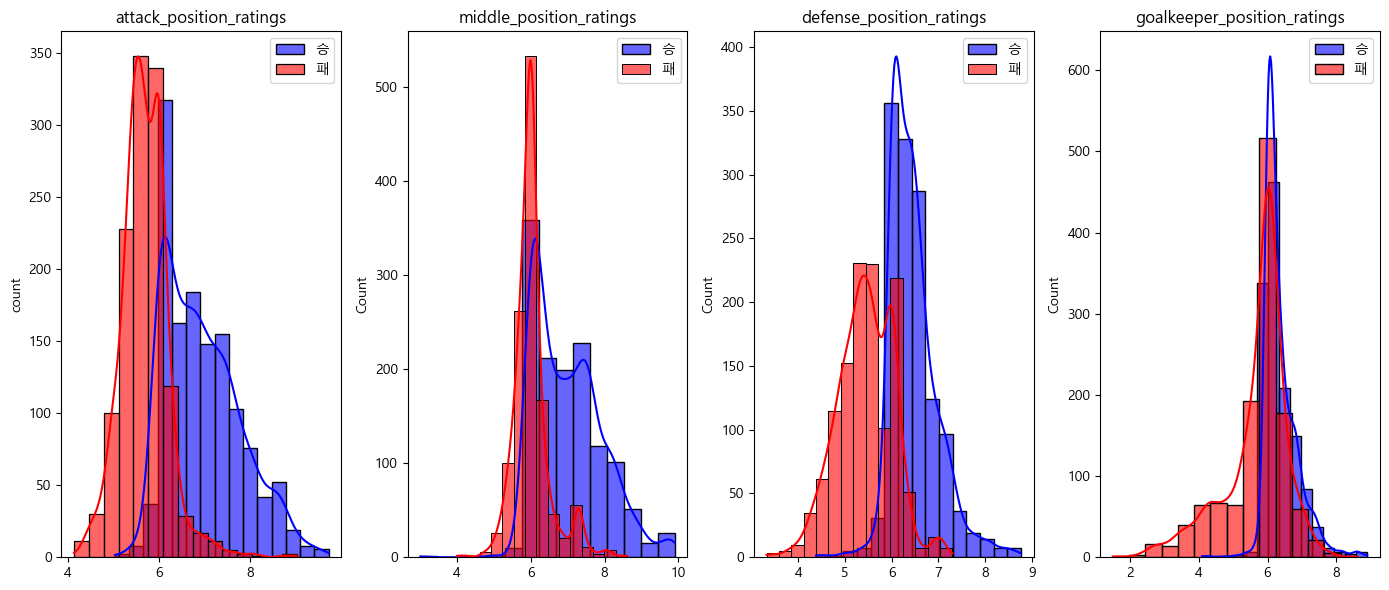

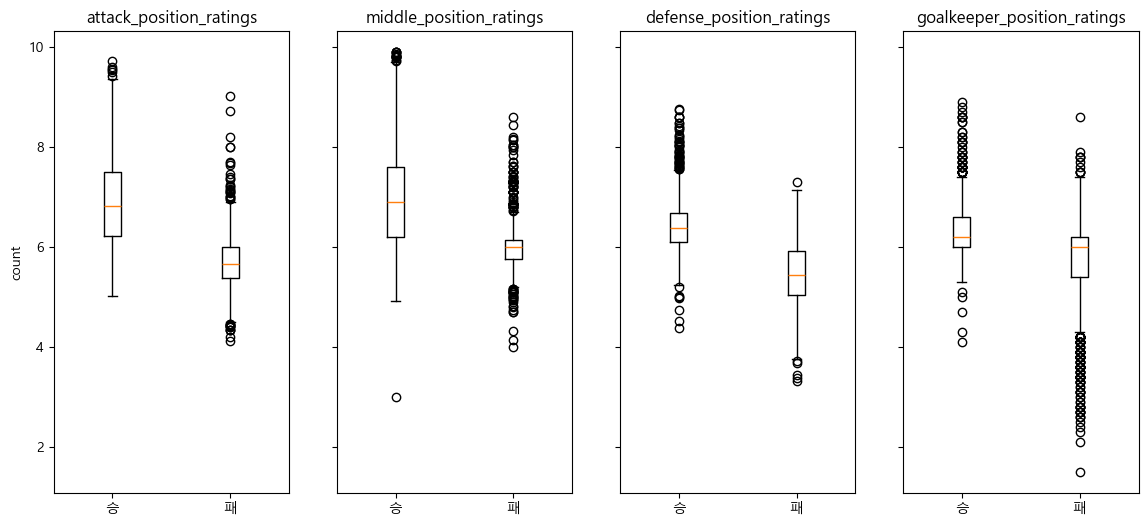

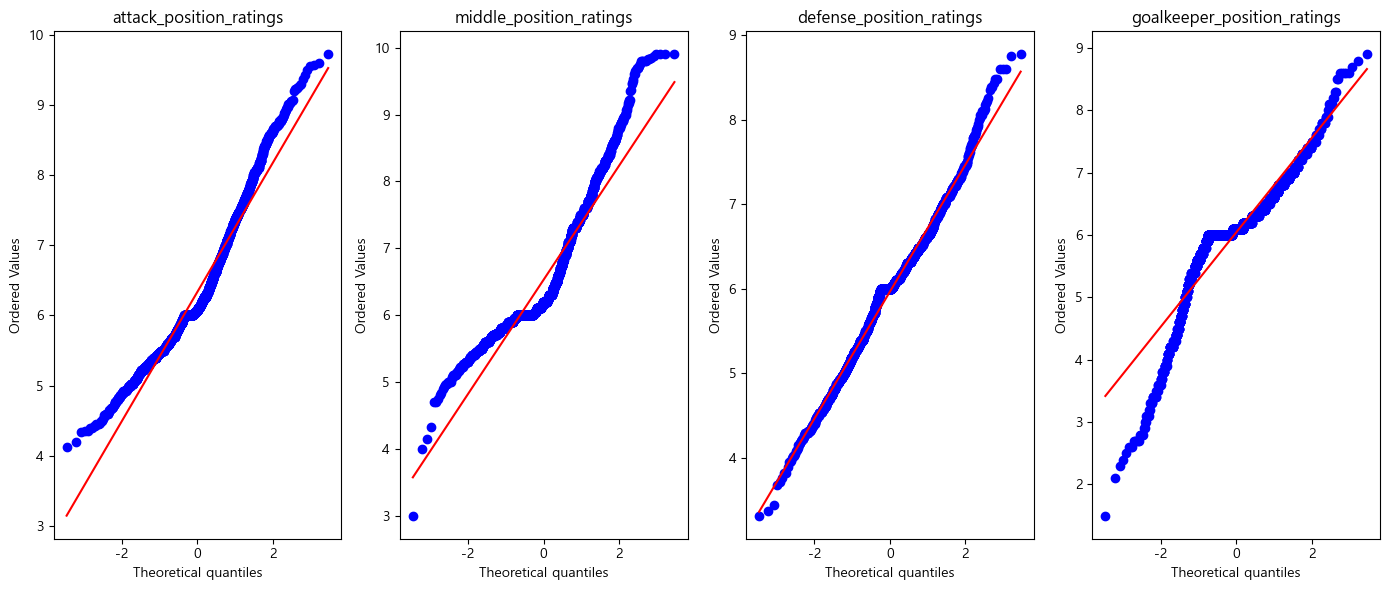

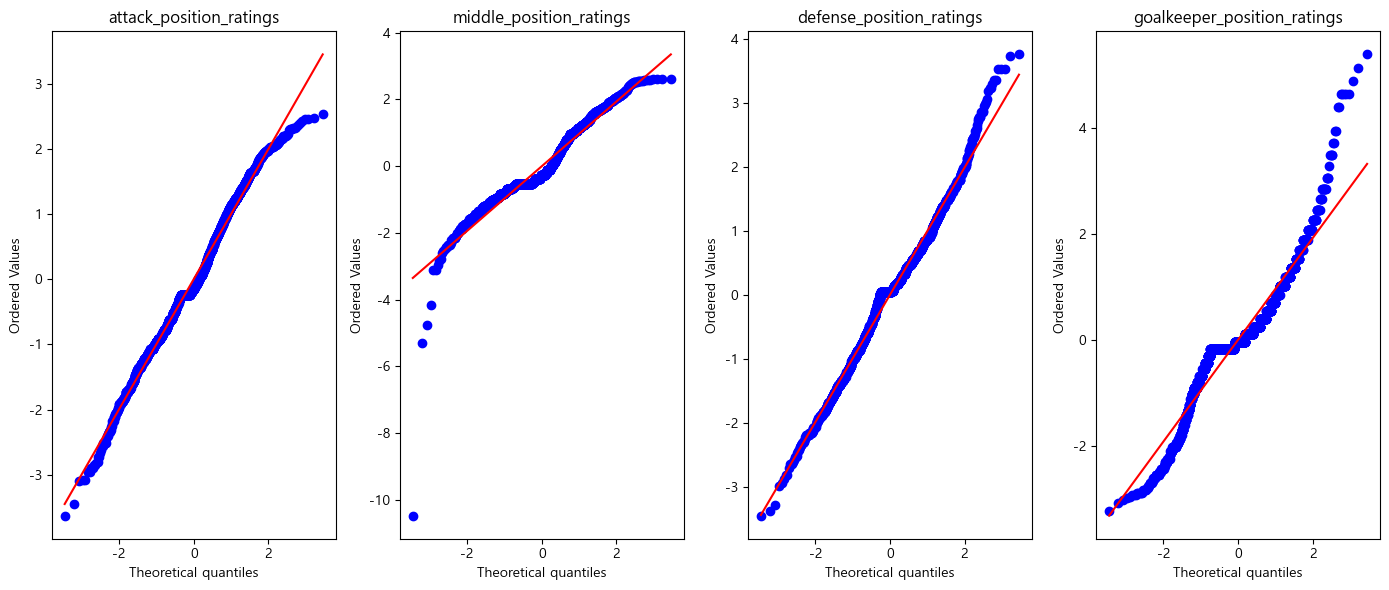

In [137]:
col_hist_all(df3_position_temp, position_ratings_col);
col_hist(df3_position_temp_win, df3_position_temp_lose, position_ratings_col);
col_boxplot(df3_position_temp_win, df3_position_temp_lose, position_ratings_col, True);
col_qqplot_all(df3_position_temp, position_ratings_col);
col_qqplot_norm_all(df3_position_temp_qq, position_ratings_col);

In [138]:
df3_position_temp_qq_win = df3_position_temp_qq[df3_position_temp_qq['match_result'] == '승']
df3_position_temp_qq_lose = df3_position_temp_qq[df3_position_temp_qq['match_result'] == '패']

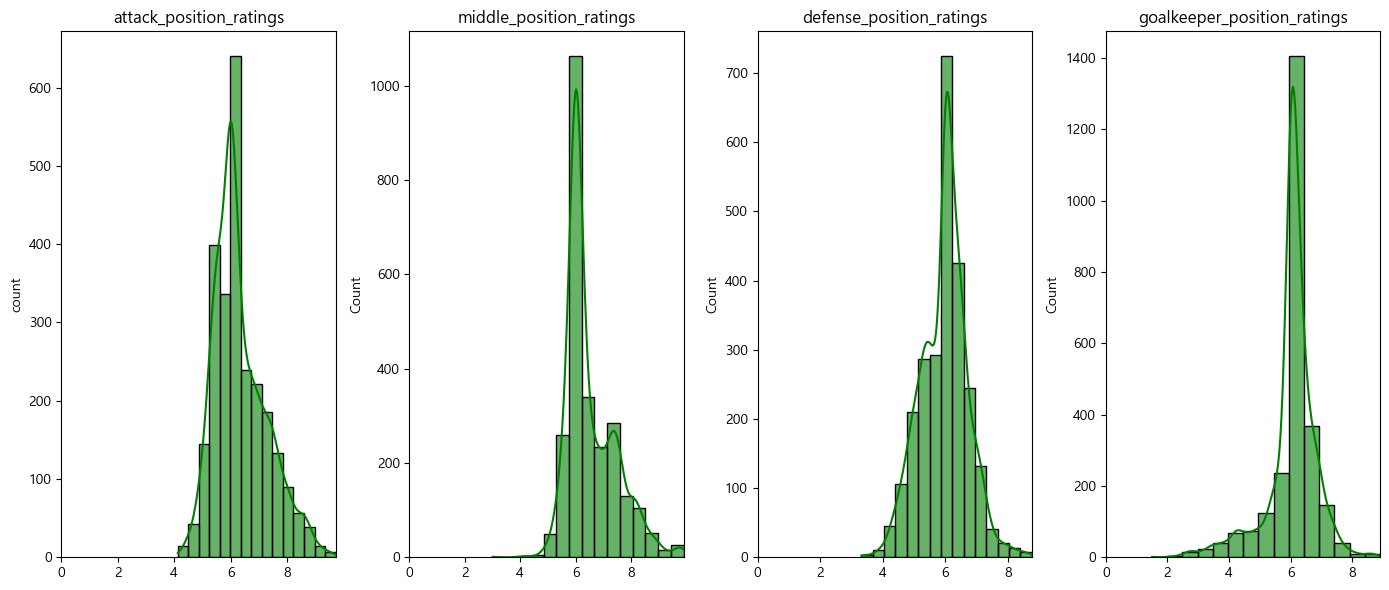

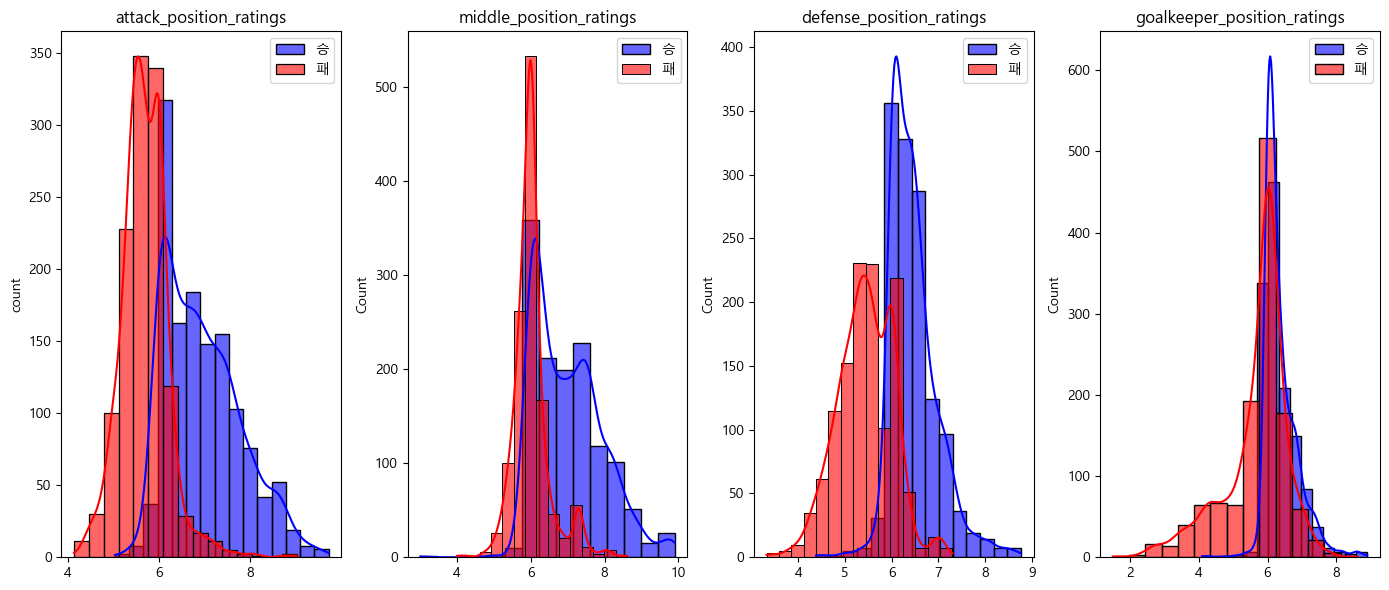

In [142]:
col_hist_all(df3_position_temp, position_ratings_col);
col_hist(df3_position_temp_win, df3_position_temp_lose, position_ratings_col);

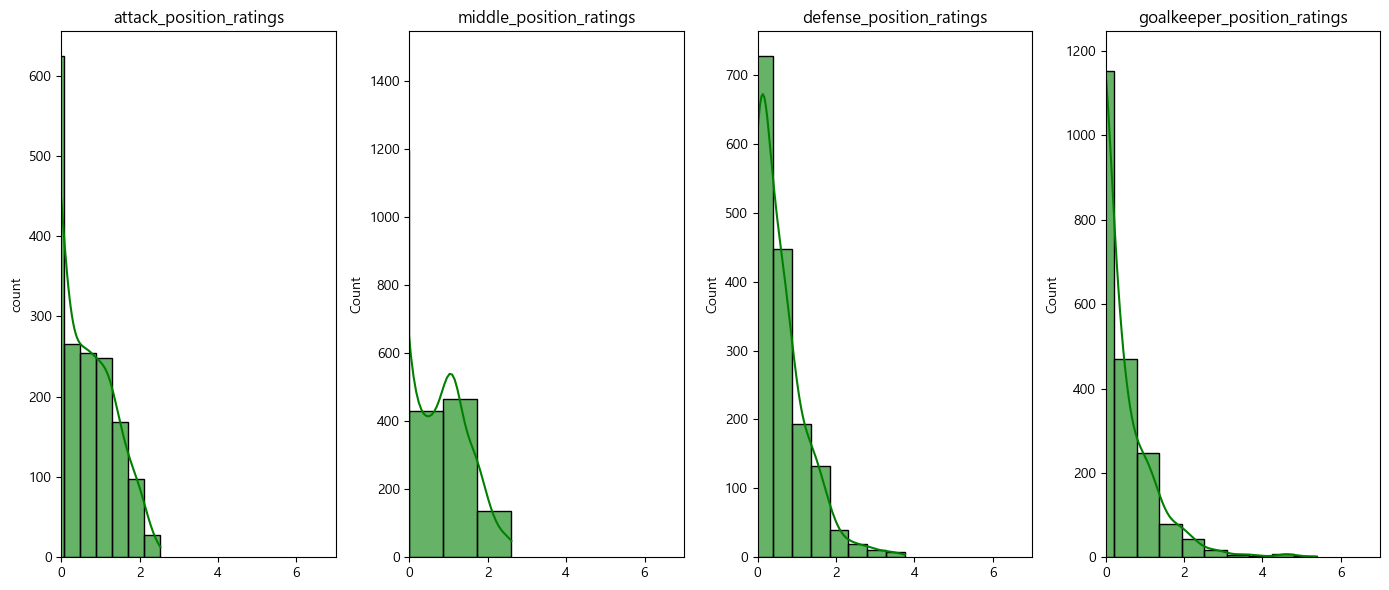

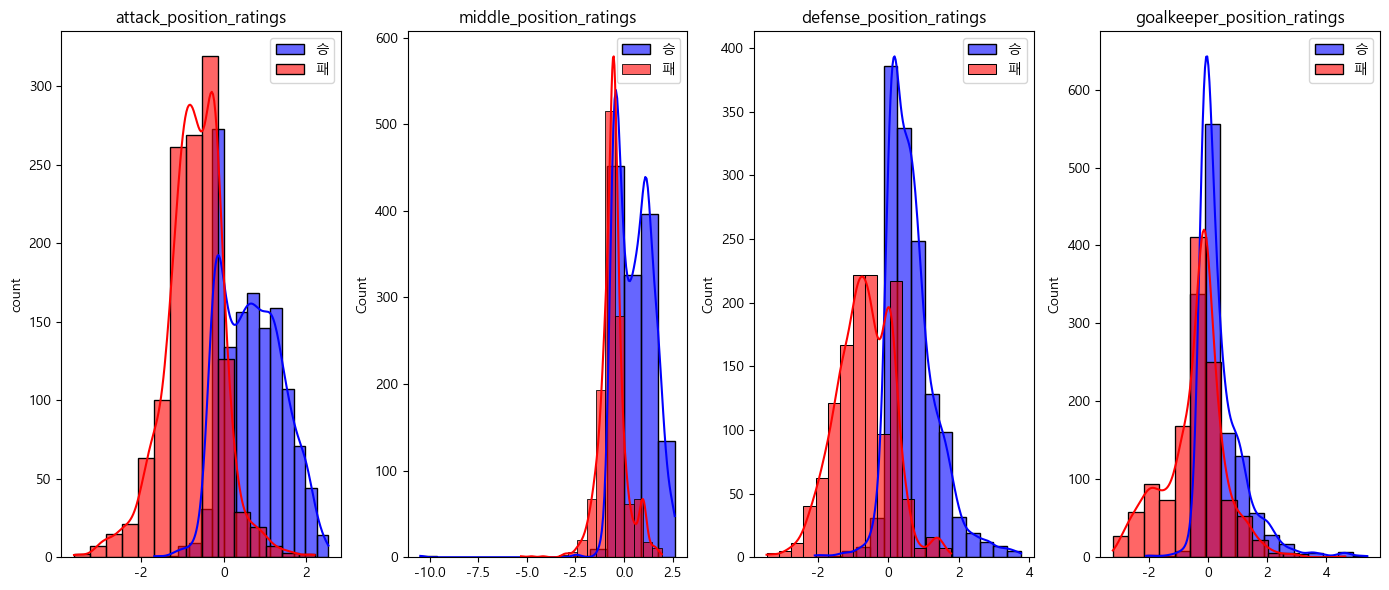

In [139]:
col_hist_all(df3_position_temp_qq, position_ratings_col);
col_hist(df3_position_temp_qq_win, df3_position_temp_qq_lose, position_ratings_col);

In [141]:
normality_test(df3_position_temp_win, df3_position_temp_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(2.779015395968604e-21, 4.018637369315889e-09)                       
 패: p-value=(1.170976428664024e-19, 6.744744358620897e-07)                       
 Levene’s test p-value=2.7809970904867556e-64
middle_position_ratings 
 승: p-value=(4.972674829823879e-24, 3.4884025857940325e-14)                       
 패: p-value=(5.114963007190142e-30, 3.96268071998687e-37)                       
 Levene’s test p-value=8.847980584628235e-113
defense_position_ratings 
 승: p-value=(3.017460847739262e-26, 2.094219461298858e-18)                       
 패: p-value=(1.8865756008367834e-07, 6.611621878220369e-05)                       
 Levene’s test p-value=3.2953285756175747e-10
goalkeeper_position_ratings 
 승: p-value=(2.443573851748739e-34, 9.020712999214966e-44)                       
 패: p-value=(3.7314025151496756e-28, 1.4031573410479406e-40)                       
 Levene’s test p-value=1.2158480815732963e-32
----------------------------------------------------

In [140]:
normality_test(df3_position_temp_qq_win, df3_position_temp_qq_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(3.823417749096195e-15, 4.069380587741458e-06)                       
 패: p-value=(1.1364816002355992e-13, 0.0002956723110489443)                       
 Levene’s test p-value=8.682348402672721e-07
middle_position_ratings 
 승: p-value=(1.6277782241423984e-27, 1.0500406019613864e-10)                       
 패: p-value=(4.896043935746978e-25, 1.7231384043306203e-22)                       
 Levene’s test p-value=2.380010404421132e-50
defense_position_ratings 
 승: p-value=(1.7586830480178728e-26, 1.5281133095701553e-18)                       
 패: p-value=(2.4207376831786177e-07, 6.486874846964313e-05)                       
 Levene’s test p-value=3.3182922646803644e-09
goalkeeper_position_ratings 
 승: p-value=(1.2374528540275727e-38, 1.127293664150749e-50)                       
 패: p-value=(3.9639578237195276e-19, 1.8056600170191988e-28)                       
 Levene’s test p-value=2.9000619550701555e-12
-----------------------------------------------